# import Libraries :

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data Into DataFrames:

In [9]:
HR_Perf= pd.read_csv("PerformanceRating.csv")
HR_Emp = pd.read_csv("Employee.csv")
HR_Edu = pd.read_csv("EducationLevel.csv")
HR_Sat = pd.read_csv("SatisfiedLevel.csv")
HR_Rat = pd.read_csv("RatingLevel.csv")

# #Check the first 5 rows

In [3]:
HR_Perf.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


# Data Cleaning For PerformaceRating Table

In [8]:
HR_Perf.columns

Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating'],
      dtype='object')

In [4]:
#Get data types:
HR_Perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [5]:
#Get summary statistics for numerical columns:
HR_Perf.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


In [5]:
#Get missing values information:
HR_Perf.isnull()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6704,False,False,False,False,False,False,False,False,False,False,False
6705,False,False,False,False,False,False,False,False,False,False,False
6706,False,False,False,False,False,False,False,False,False,False,False
6707,False,False,False,False,False,False,False,False,False,False,False


In [6]:
HR_Perf.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

# Handle Null Values:

In [ ]:
# Fill missing values in categorical columns with the mode value
HR_Perf['EmployeeID'].ffill()
HR_Perf['ReviewDate'].fillna(HR_Perf['ReviewDate'].mode()[0])

In [ ]:
# Fill missing values in numerical columns with the mean value
HR_Perf['EnvironmentSatisfaction'].fillna(HR_Perf['EnvironmentSatisfaction'].mean()) 
HR_Perf['JobSatisfaction'].fillna(HR_Perf['JobSatisfaction'].mean())
HR_Perf['RelationshipSatisfaction'].fillna(HR_Perf['RelationshipSatisfaction'].mean())
HR_Perf['TrainingOpportunitiesWithinYear'].fillna(HR_Perf['TrainingOpportunitiesWithinYear'].mean())
HR_Perf['TrainingOpportunitiesTaken'].fillna(HR_Perf['TrainingOpportunitiesTaken'].mean())
HR_Perf['WorkLifeBalance'].fillna(HR_Perf['WorkLifeBalance'].mean())
HR_Perf['SelfRating'].fillna(HR_Perf['SelfRating'].mean())
HR_Perf['ManagerRating'].fillna(HR_Perf['ManagerRating'].mean())

In [4]:
#OR Dropping Missing Values :
HR_Perf.dropna()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...
6704,PR995,4F28-CFAF,2016-03-14,5,3,3,3,1,5,5,4
6705,PR996,7C80-94E0,2016-03-14,3,5,4,2,1,3,4,4
6706,PR997,8233-2483,2016-03-14,3,4,2,3,1,2,3,2
6707,PR998,8A5B-3D6E,2016-03-15,5,2,5,2,2,4,3,3


# Correct Data Types

In [10]:
#Change ReviewDate, HireDate column to Time Data Type:
HR_Perf['ReviewDate'] = pd.to_datetime(HR_Perf['ReviewDate'])

# Ensure numerical columns have correct types

In [21]:
HR_Perf['EnvironmentSatisfaction'].dtypes

dtype('int64')

In [22]:
HR_Perf['JobSatisfaction'].dtypes

dtype('int64')

In [23]:
HR_Perf['RelationshipSatisfaction'].dtypes

dtype('int64')

In [24]:
HR_Perf['TrainingOpportunitiesWithinYear'].dtypes

dtype('int64')

In [25]:
HR_Perf['TrainingOpportunitiesTaken'].dtypes

dtype('int64')

In [26]:
HR_Perf['WorkLifeBalance'].dtypes

dtype('int64')

In [27]:
HR_Perf['SelfRating'].dtypes

dtype('int64')

In [28]:
HR_Perf['ManagerRating'].dtypes

dtype('int64')

In [11]:
#Get Unique Values 
HR_Perf.nunique()

PerformanceID                      6709
EmployeeID                         1280
ReviewDate                         2771
EnvironmentSatisfaction               5
JobSatisfaction                       5
RelationshipSatisfaction              5
TrainingOpportunitiesWithinYear       3
TrainingOpportunitiesTaken            4
WorkLifeBalance                       5
SelfRating                            3
ManagerRating                         4
dtype: int64

In [7]:
# Handle Duplicates: 
HR_Perf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6704    False
6705    False
6706    False
6707    False
6708    False
Length: 6709, dtype: bool

In [9]:
HR_Perf.duplicated().sum()

np.int64(0)

In [6]:
HR_Perf.drop_duplicates(inplace=True)

# Check the first 5 rows of Employee Table:

In [5]:
HR_Emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


# Data Cleaning:

In [7]:
HR_Emp.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
#Get data types:
HR_Emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   DistanceFromHome(KM)     1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole                  1470 non-

In [33]:
#Get summary statistics for numerical columns:
HR_Emp.describe()

,Age,DistanceFromHome(KM),Education,Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,2017-07-05 14:50:26.938775296,4.562585,2.293197,3.440816,2.239456
min,18.000000,1.000000,1.000000,20387.000000,0.000000,2012-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2014-07-10 06:00:00,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,2017-09-02 00:00:00,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,2020-05-14 18:00:00,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,2022-12-31 00:00:00,10.000000,10.000000,10.000000,10.000000
std,7.993055,12.811124,1.024165,103342.889222,0.852077,NaN,3.288048,2.539093,2.945194,2.505774


In [60]:
#Get missing values information:
HR_Emp.isnull()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
HR_Emp.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# Handle Null Values:

In [ ]:
# Fill missing values in numerical columns with the mean value
HR_Emp['Age'].fillna(HR_Emp['Age'].mean()) 
HR_Emp['DistanceFromHome(KM)'].fillna(HR_Emp['DistanceFromHome(KM)'].mean())
HR_Emp['Salary'].fillna(HR_Emp['Salary'].mean())
HR_Emp['StockOptionLevel'].fillna(HR_Emp['StockOptionLevel'].mean())
HR_Emp['YearsAtCompany'].fillna(HR_Emp['YearsAtCompany'].mean())
HR_Emp['YearsInMostRecentRole'].fillna(HR_Emp['YearsInMostRecentRole'].mean())
HR_Emp['YearsSinceLastPromotion'].fillna(HR_Emp['YearsSinceLastPromotion'].mean())
HR_Emp['YearsWithCurrManager'].fillna(HR_Emp['YearsWithCurrManager'].mean())

In [ ]:
# Fill missing values in categorical columns with the mode value
HR_Emp['FirstName'].ffill()
HR_Emp['LastName'].ffill()
HR_Emp['Education'].bfill()
HR_Emp['EducationField'].bfill()
HR_Emp['HireDate'].bfill()
HR_Emp['Gender'].fillna(HR_Emp['Gender'].mode()[0])
HR_Emp['BusinessTravel'].fillna(HR_Emp['BusinessTravel'].mode()[0])
HR_Emp['Department'].fillna(HR_Emp['Department'].mode()[0])
HR_Emp['State'].fillna(HR_Emp['State'].mode()[0])
HR_Emp['Ethnicity'].fillna(HR_Emp['Ethnicity'].mode()[0])
HR_Emp['JobRole'].fillna(HR_Emp['JobRole'].mode()[0])
HR_Emp['MaritalStatus'].fillna(HR_Emp['MaritalStatus'].mode()[0])
HR_Emp['OverTime'].fillna(HR_Emp['OverTime'].mode()[0])
HR_Emp['Attrition'].fillna(HR_Emp['Attrition'].mode()[0])


In [7]:
#OR Dropping Missing Values :
HR_Emp.dropna()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


# Ensure numerical columns have correct types

In [46]:
HR_Emp['Age'].dtypes

dtype('int64')

In [64]:
HR_Emp['DistanceFromHome(KM)'].dtypes

dtype('int64')

In [65]:
HR_Emp['Salary'].dtypes

dtype('int64')

In [66]:
HR_Emp['StockOptionLevel'].dtypes

dtype('int64')

In [67]:
HR_Emp['YearsAtCompany'].dtypes

dtype('int64')

In [68]:
HR_Emp['YearsInMostRecentRole'].dtypes

dtype('int64')

In [69]:
HR_Emp['YearsSinceLastPromotion'].dtypes

dtype('int64')

In [71]:
HR_Emp['YearsWithCurrManager'].dtypes

dtype('int64')

In [73]:
# Handle Duplicates: 
HR_Emp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [75]:
HR_Emp.duplicated().sum()

np.int64(0)

In [8]:
HR_Emp.drop_duplicates(inplace=True)

# Correct Data Types

In [11]:
#Change HireDate column to Time Data Type:
HR_Emp['HireDate']=pd.to_datetime(HR_Emp['HireDate'])

In [12]:
#Remove Space Frome Marketing Value:
HR_Emp.rename(columns={'DistanceFromHome (KM)': 'DistanceFromHome(KM)'}, inplace=True)

HR_Emp['EducationField'] = HR_Emp['EducationField'].replace('Marketing ', 'Marketing')
HR_Emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


# Handling Gender Values

In [13]:
HR_Emp['Gender'] = HR_Emp['Gender'].replace(['Non-Binary', 'Prefer Not To Say'], 'OTher')
HR_Emp[['Gender']]

,Gender
0,Female
1,Male
2,Male
3,OTher
4,Female
...,...
1465,Male
1466,OTher
1467,Male
1468,Male


# Handling Gender Values

In [14]:
HR_Emp['State'] = HR_Emp['State'].replace('NY' , 'New York')
HR_Emp['State'] = HR_Emp['State'].replace('CA' , 'California')
HR_Emp['State'] = HR_Emp['State'].replace('IL' , 'Illinois')
HR_Emp[['State']].head(20)

,State
0,Illinois
1,California
2,California
3,Illinois
4,California
5,New York
6,New York
7,California
8,Illinois
9,New York


In [9]:
HR_Emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,Illinois,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,California,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,California,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,OTher,39,Some Travel,Technology,12,Illinois,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,California,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [10]:
#Get Unique Values 
HR_Emp.nunique()

EmployeeID                 1470
FirstName                  1334
LastName                   1441
Gender                        3
Age                          34
BusinessTravel                3
Department                    3
DistanceFromHome(KM)         45
State                         3
Ethnicity                     7
Education                     5
EducationField                8
JobRole                      13
MaritalStatus                 3
Salary                     1455
StockOptionLevel              4
OverTime                      2
HireDate                   1192
Attrition                     2
YearsAtCompany               11
YearsInMostRecentRole        11
YearsSinceLastPromotion      11
YearsWithCurrManager         11
dtype: int64

# Delete Rows With Ages Smaler than 18 And Greater Than 60

In [11]:
HR_Emp[(HR_Emp['Age']>=18) & (HR_Emp['Age']<=60)]

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,Illinois,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,California,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,California,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,OTher,39,Some Travel,Technology,12,Illinois,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,California,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,California,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,OTher,27,Some Travel,Technology,8,California,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,California,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,California,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


# Ctegorizing Age Into Ranges:

In [15]:
# Function to categorize the Age into ranges
def Age_Range(age):
    if 18 <= age < 30:
        return '18 - 30'
    elif 30 <= age < 40:
        return '30 - 40'
    elif 40 <= age <= 50:
        return '40 - 50'
    else:
        return 'Above 50'

# Apply the function to create the AgeRange column
HR_Emp['AgeRange'] = HR_Emp['Age'].apply(Age_Range)
HR_Emp['AgeRange']

0       30 - 40
1       30 - 40
2       40 - 50
3       30 - 40
4       18 - 30
         ...   
1465    18 - 30
1466    18 - 30
1467    18 - 30
1468    18 - 30
1469    18 - 30
Name: AgeRange, Length: 1470, dtype: object

# Categorizing Distance Into Ranges:

In [16]:
# Function to categorize the Age into ranges
def distance_range(Distance):
    if 1 <= Distance < 10:
        return '1-10 km'
    elif 10 <= Distance < 20:
        return '10-20 km'
    elif 20 <= Distance < 30:
        return '20-30 km'
    elif 30 <= Distance <=40:
        return '30-40 km'
    else:
        return 'Above 40 km'

# Apply the function to create the AgeRange column
HR_Emp['DistanceRange'] = HR_Emp['DistanceFromHome(KM)'].apply(distance_range)
HR_Emp[['DistanceRange']]

,DistanceRange
0,20-30 km
1,20-30 km
2,20-30 km
3,10-20 km
4,20-30 km
...,...
1465,20-30 km
1466,1-10 km
1467,1-10 km
1468,1-10 km


# Merge Employee and Education table on EpolyeeID"

In [17]:
HR_Employee = pd.merge(HR_Emp, HR_Edu, left_on='Education',right_on='EducationLevelID' , how='inner')

In [12]:
HR_Employee.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome(KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeRange', 'DistanceRange', 'EducationLevelID',
       'EducationLevel'],
      dtype='object')

# Merge Performance and Satisfaction table on SatisfactionID to get EnvironmentSatisfaction:

In [18]:
HR_Performance = pd.merge(HR_Perf,HR_Sat, left_on=['EnvironmentSatisfaction'],right_on=['SatisfactionID'], how='inner')

# Merge Performance and Satisfaction table on SatisfactionID to get JobSatisfaction :

In [19]:
HR_Performance = pd.merge(HR_Performance,HR_Sat, left_on=['JobSatisfaction'],right_on=['SatisfactionID'], how='inner')

# Merge Performance and Satisfaction table on SatisfactionID to get RelationshipSatisfaction:

In [20]:
HR_Performance = pd.merge(HR_Performance,HR_Sat, left_on=['RelationshipSatisfaction'],right_on=['SatisfactionID'], how='inner')

# Merge Performance and Satisfaction table on SatisfactionID to get WorkLifeBalance: 

In [21]:
HR_Performance = pd.merge(HR_Performance,HR_Sat, left_on=['WorkLifeBalance'],right_on=['SatisfactionID'],suffixes=['_z','_w'], how='inner')

# Merge Performance and Rating table on RatingID to get SelfRating :

In [22]:
HR_Performance= pd.merge(HR_Performance,HR_Rat, left_on=['SelfRating'],right_on=['RatingID'], how='inner')

# Merge Performance and Rating table on RatingID to get ManagerRating:

In [23]:
HR_Performance= pd.merge(HR_Performance,HR_Rat, left_on=['ManagerRating'],right_on=['RatingID'], how='inner')

# Modify Columns Names:

In [24]:
HR_Performance.rename(columns={'SatisfactionLevel_x': 'EnvironmentSatisfactionLevel'},inplace=True)

In [25]:
HR_Performance.rename(columns={'SatisfactionLevel_y': 'JobSatisfactionLevel'},inplace=True)

In [26]:
HR_Performance.rename(columns={'SatisfactionLevel_z': 'RelationshipSatisfactionLevel'},inplace=True)

In [27]:
HR_Performance.rename(columns={'SatisfactionLevel_w': 'WorkLifeBalanceLevel'},inplace=True)

In [28]:
HR_Performance.rename(columns={'RatingLevel_x': 'SelfRatingLevel'},inplace=True)

In [29]:
HR_Performance.rename(columns={'RatingLevel_y': 'ManagerRatingLevel'},inplace=True)

In [30]:
HR_Performance[['EnvironmentSatisfactionLevel','JobSatisfactionLevel','RelationshipSatisfactionLevel','WorkLifeBalanceLevel','SelfRatingLevel','ManagerRatingLevel']]

,EnvironmentSatisfactionLevel,JobSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel,SelfRatingLevel,ManagerRatingLevel
0,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Exceeds Expectation,Exceeds Expectation
1,Very Satisfied,Satisfied,Satisfied,Satisfied,Exceeds Expectation,Meets Expectation
2,Neutral,Satisfied,Very Satisfied,Neutral,Above and Beyond,Exceeds Expectation
3,Very Satisfied,Neutral,Dissatisfied,Dissatisfied,Meets Expectation,Needs Improvement
4,Very Satisfied,Dissatisfied,Neutral,Satisfied,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...
6704,Very Satisfied,Neutral,Neutral,Very Satisfied,Above and Beyond,Exceeds Expectation
6705,Neutral,Very Satisfied,Satisfied,Neutral,Exceeds Expectation,Exceeds Expectation
6706,Neutral,Satisfied,Dissatisfied,Dissatisfied,Meets Expectation,Needs Improvement
6707,Very Satisfied,Dissatisfied,Very Satisfied,Satisfied,Meets Expectation,Meets Expectation


# Merge Final Performance and final Emplyee table on EmployeeID to :

In [31]:
HR_Data = pd.merge(HR_Performance , HR_Employee , on='EmployeeID',how = 'inner')

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,...,2013-12-14,Yes,5,5,5,1,18 - 30,30-40 km,4,Masters
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,...,2014-11-07,Yes,7,2,7,1,18 - 30,1-10 km,3,Bachelors
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,...,2015-01-13,Yes,3,0,2,1,18 - 30,1-10 km,3,Bachelors
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,...,2015-05-11,Yes,6,5,6,2,18 - 30,1-10 km,2,High School
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,...,2014-04-02,Yes,1,0,0,1,18 - 30,30-40 km,1,No Formal Qualifications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,PR995,4F28-CFAF,2016-03-14,5,3,3,3,1,5,5,...,2018-09-13,Yes,3,2,3,1,18 - 30,10-20 km,3,Bachelors
6705,PR996,7C80-94E0,2016-03-14,3,5,4,2,1,3,4,...,2013-01-01,No,9,8,8,6,30 - 40,30-40 km,3,Bachelors
6706,PR997,8233-2483,2016-03-14,3,4,2,3,1,2,3,...,2012-03-12,No,10,5,6,3,30 - 40,1-10 km,3,Bachelors
6707,PR998,8A5B-3D6E,2016-03-15,5,2,5,2,2,4,3,...,2016-01-14,No,6,6,6,5,18 - 30,20-30 km,1,No Formal Qualifications


In [35]:
HR_Data

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel,CurrentDate
6,PR07,9E7A-1F70,2013-01-08,3,4,5,2,1,5,4,...,Yes,5,1,1,2,18 - 30,1-10 km,2,High School,2017-05-01
11,PR1000,528C-3E0D,2016-03-16,4,4,2,2,2,4,5,...,Yes,6,0,3,3,30 - 40,1-10 km,1,No Formal Qualifications,2019-10-14
12,PR1001,D077-169C,2016-03-17,3,5,3,2,2,3,5,...,No,10,8,9,3,40 - 50,20-30 km,2,High School,2022-03-04
13,PR1002,9727-BC84,2016-03-18,4,3,3,2,2,2,4,...,Yes,3,2,2,0,30 - 40,10-20 km,3,Bachelors,2015-04-07
16,PR1005,88B8-EB84,2016-03-19,3,4,2,3,1,4,5,...,No,10,9,9,3,30 - 40,Above 40 km,2,High School,2022-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6703,PR994,B3FE-D332,2016-03-13,4,4,3,1,1,3,4,...,No,9,8,9,4,30 - 40,Above 40 km,5,Doctorate,2022-03-13
6705,PR996,7C80-94E0,2016-03-14,3,5,4,2,1,3,4,...,No,9,8,8,6,30 - 40,30-40 km,3,Bachelors,2021-12-30
6706,PR997,8233-2483,2016-03-14,3,4,2,3,1,2,3,...,No,10,5,6,3,30 - 40,1-10 km,3,Bachelors,2022-03-10
6707,PR998,8A5B-3D6E,2016-03-15,5,2,5,2,2,4,3,...,No,6,6,6,5,18 - 30,20-30 km,1,No Formal Qualifications,2022-01-12


In [29]:
HR_Data[['EnvironmentSatisfactionLevel', 'JobSatisfactionLevel', 'RelationshipSatisfactionLevel',
'WorkLifeBalanceLevel', 'SelfRatingLevel', 'ManagerRatingLevel']].head()

,EnvironmentSatisfactionLevel,JobSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel,SelfRatingLevel,ManagerRatingLevel
0,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Exceeds Expectation,Exceeds Expectation
1,Very Satisfied,Satisfied,Satisfied,Satisfied,Exceeds Expectation,Meets Expectation
2,Neutral,Satisfied,Very Satisfied,Neutral,Above and Beyond,Exceeds Expectation
3,Very Satisfied,Neutral,Dissatisfied,Dissatisfied,Meets Expectation,Needs Improvement
4,Very Satisfied,Dissatisfied,Neutral,Satisfied,Exceeds Expectation,Meets Expectation


# Identifying #Employee who Not Rated:

In [30]:
#190 Employees
NonRated_Emp = HR_Emp[~HR_Emp['EmployeeID'].isin(HR_Perf['EmployeeID'])]
NonRated_Emp

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange
1248,3BAB-C57E,Hashim,Payn,Male,19,Some Travel,Technology,28,California,White,...,3,Yes,2021-06-30,No,1,1,1,1,18 - 30,20-30 km
1249,BC20-368E,Flem,Simenon,Male,39,Some Travel,Sales,37,New York,White,...,1,Yes,2021-07-06,No,1,0,0,1,30 - 40,30-40 km
1250,F3AE-DEF2,Vern,Foord,Male,20,Frequent Traveller,Technology,39,California,White,...,0,No,2021-07-07,No,1,1,1,0,18 - 30,30-40 km
1251,F5B1-A266,Arly,Fleetham,Female,22,Some Travel,Technology,34,California,White,...,1,No,2021-07-09,No,1,0,1,1,18 - 30,30-40 km
1252,2EB9-9D31,Cybill,Mitkin,Female,27,No Travel,Human Resources,4,California,White,...,1,No,2021-07-10,No,1,1,1,1,18 - 30,1-10 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,California,Black or African American,...,0,No,2022-12-26,No,0,0,0,0,18 - 30,20-30 km
1466,6FB9-A624,Marc,Calver,OTher,27,Some Travel,Technology,8,California,Black or African American,...,3,No,2022-12-30,No,0,0,0,0,18 - 30,1-10 km
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,California,Black or African American,...,0,No,2022-12-30,No,0,0,0,0,18 - 30,1-10 km
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,California,Black or African American,...,0,No,2022-12-30,No,0,0,0,0,18 - 30,1-10 km


# Identifying #Employee who Rated:

In [31]:
#1280Employees
HR_Data['EmployeeID'].unique()

array(['79F7-78EC', 'B61E-0F26', 'F5E3-48BB', ..., 'AAD7-8DDC',
       'A2AE-FD61', 'D6BA-10A1'], shape=(1280,), dtype=object)

# Calculate Date From HireDate And Convert DateType:

In [39]:
HR_Data.loc[:, 'CurrentDate'] = HR_Data['HireDate'] + pd.to_timedelta(HR_Data['YearsAtCompany'] * 365, unit='D')
HR_Data.loc[:, "CurrentDate"] = pd.to_datetime(HR_Data["CurrentDate"])

# Check If There are Inconsistent ReviewDate :

In [31]:
#ReviewDate Before HireDate
HR_Before = HR_Data[HR_Data["ReviewDate"] < HR_Data["HireDate"]]
HR_Before

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel,CurrentDate
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,...,Yes,5,5,5,1,18 - 30,30-40 km,4,Masters,2018-12-13
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,...,Yes,7,2,7,1,18 - 30,1-10 km,3,Bachelors,2021-11-05
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,...,Yes,3,0,2,1,18 - 30,1-10 km,3,Bachelors,2018-01-12
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,...,Yes,6,5,6,2,18 - 30,1-10 km,2,High School,2021-05-09
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,...,Yes,1,0,0,1,18 - 30,30-40 km,1,No Formal Qualifications,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,PR987,B005-602F,2016-03-10,5,3,2,2,3,4,5,...,Yes,0,0,0,0,18 - 30,10-20 km,4,Masters,2022-11-06
6696,PR988,4A0E-9958,2016-03-11,4,4,2,1,1,2,3,...,Yes,1,0,0,0,18 - 30,1-10 km,4,Masters,2017-10-04
6697,PR989,CFE3-312D,2016-03-11,5,4,3,3,0,5,5,...,Yes,1,1,1,0,18 - 30,30-40 km,4,Masters,2021-11-08
6698,PR99,2FC6-7ED5,2013-04-07,4,2,4,3,1,4,5,...,No,4,0,0,0,40 - 50,20-30 km,1,No Formal Qualifications,2022-08-23


In [32]:
#ReviewDate After CurrentDate For Employee Who Left
HR_After = HR_Data[((HR_Data["Attrition"] == "Yes") & (HR_Data["ReviewDate"] > HR_Data["CurrentDate"]))] # Attrition = Yes and ReviewDate > AttritionDate   
HR_After

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel,CurrentDate
13,PR1002,9727-BC84,2016-03-18,4,3,3,2,2,2,4,...,Yes,3,2,2,0,30 - 40,10-20 km,3,Bachelors,2015-04-07
23,PR1011,5160-53BD,2016-03-24,4,2,5,1,2,2,5,...,Yes,0,0,0,0,18 - 30,20-30 km,3,Bachelors,2014-08-19
27,PR1015,6176-3BEE,2016-03-27,5,3,2,2,0,5,5,...,Yes,2,2,2,2,18 - 30,20-30 km,3,Bachelors,2015-02-04
44,PR1030,B6EC-313E,2016-04-03,5,4,5,2,1,4,5,...,Yes,0,0,0,0,18 - 30,10-20 km,3,Bachelors,2014-08-09
45,PR1031,0D8F-C0F3,2016-04-05,4,2,4,2,2,3,5,...,Yes,1,0,0,0,18 - 30,Above 40 km,3,Bachelors,2014-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6659,PR954,3560-C117,2016-02-27,4,3,4,3,3,3,3,...,Yes,2,0,0,0,18 - 30,1-10 km,3,Bachelors,2014-05-09
6680,PR973,1054-9C3B,2016-03-05,4,2,5,2,3,4,5,...,Yes,1,1,1,0,30 - 40,1-10 km,4,Masters,2014-03-21
6681,PR974,155B-42BE,2016-03-05,4,5,3,3,2,4,5,...,Yes,1,0,0,0,18 - 30,30-40 km,2,High School,2016-02-21
6684,PR977,8567-5B27,2016-03-06,5,3,4,2,0,2,3,...,Yes,3,0,0,1,18 - 30,30-40 km,1,No Formal Qualifications,2015-04-27


# Filter rows where ReviewDate is After HireDate And Before LeaveDate For Those who Left :


In [32]:
HR_Data = HR_Data[
    (HR_Data["ReviewDate"] >= HR_Data["HireDate"])  # Condition 1: ReviewDate after HireDate for all rows
]

# Filter rows where ReviewDate is After HireDate And Before LeaveDate For Those who Left :


In [37]:
HR_Data = HR_Data[
        (HR_Data["Attrition"] == "No") |       # Condition 2: All rows with Attrition = No
        ((HR_Data["Attrition"] == "Yes") & (HR_Data["ReviewDate"] <= HR_Data["CurrentDate"]))  # Attrition = Yes and ReviewDate < DateFromHire   
]

In [40]:
HR_Data

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel,CurrentDate
6,PR07,9E7A-1F70,2013-01-08,3,4,5,2,1,5,4,...,Yes,5,1,1,2,18 - 30,1-10 km,2,High School,2017-05-01
11,PR1000,528C-3E0D,2016-03-16,4,4,2,2,2,4,5,...,Yes,6,0,3,3,30 - 40,1-10 km,1,No Formal Qualifications,2019-10-14
12,PR1001,D077-169C,2016-03-17,3,5,3,2,2,3,5,...,No,10,8,9,3,40 - 50,20-30 km,2,High School,2022-03-04
16,PR1005,88B8-EB84,2016-03-19,3,4,2,3,1,4,5,...,No,10,9,9,3,30 - 40,Above 40 km,2,High School,2022-03-22
17,PR1006,9C57-828C,2016-03-19,5,4,2,1,1,2,3,...,No,9,3,3,9,30 - 40,30-40 km,3,Bachelors,2022-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6702,PR993,56A5-271B,2016-03-13,4,2,2,1,1,4,4,...,No,9,8,9,9,30 - 40,10-20 km,4,Masters,2022-10-08
6703,PR994,B3FE-D332,2016-03-13,4,4,3,1,1,3,4,...,No,9,8,9,4,30 - 40,Above 40 km,5,Doctorate,2022-03-13
6705,PR996,7C80-94E0,2016-03-14,3,5,4,2,1,3,4,...,No,9,8,8,6,30 - 40,30-40 km,3,Bachelors,2021-12-30
6706,PR997,8233-2483,2016-03-14,3,4,2,3,1,2,3,...,No,10,5,6,3,30 - 40,1-10 km,3,Bachelors,2022-03-10


In [41]:
# If There are any non-valid ReviewDate (Before)
HR_Data[HR_Data["ReviewDate"] < HR_Data["HireDate"]]

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel,CurrentDate


In [42]:
# If There are any non-valid ReviewDate (After)
HR_Data[((HR_Data["Attrition"] == "Yes") & (HR_Data["ReviewDate"] > HR_Data["CurrentDate"]))]

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel,CurrentDate


# Check Review Date Validaty :

In [43]:
HR_Data[HR_Data['Attrition']=='Yes'][['HireDate','ReviewDate']].head(50)

,HireDate,ReviewDate
6,2012-05-02,2013-01-08
11,2013-10-15,2016-03-16
18,2012-04-26,2016-03-22
19,2012-02-02,2016-03-23
21,2012-04-23,2013-04-12
34,2015-12-06,2016-03-30
37,2014-06-20,2016-03-31
48,2012-03-08,2016-04-06
59,2013-08-26,2016-04-12
61,2014-05-16,2016-04-13


In [41]:
HR_PerformanceRating = HR_Data[['PerformanceID', 'EmployeeID', 'ReviewDate', 'CurrentDate', 'EnvironmentSatisfaction', 
'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'SelfRating', 'ManagerRating',
'EnvironmentSatisfactionLevel', 'JobSatisfactionLevel', 'RelationshipSatisfactionLevel', 'WorkLifeBalanceLevel',
'SelfRatingLevel', 'ManagerRatingLevel','TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken']]
HR_PerformanceRating.head()

,PerformanceID,EmployeeID,ReviewDate,CurrentDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,SelfRating,ManagerRating,EnvironmentSatisfactionLevel,JobSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel,SelfRatingLevel,ManagerRatingLevel,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken
6,PR07,9E7A-1F70,2013-01-08,2017-05-01,3,4,5,5,4,3,Neutral,Satisfied,Very Satisfied,Very Satisfied,Exceeds Expectation,Meets Expectation,2,1
11,PR1000,528C-3E0D,2016-03-16,2019-10-14,4,4,2,4,5,5,Satisfied,Satisfied,Dissatisfied,Satisfied,Above and Beyond,Above and Beyond,2,2
12,PR1001,D077-169C,2016-03-17,2022-03-04,3,5,3,3,5,5,Neutral,Very Satisfied,Neutral,Neutral,Above and Beyond,Above and Beyond,2,2
16,PR1005,88B8-EB84,2016-03-19,2022-03-22,3,4,2,4,5,5,Neutral,Satisfied,Dissatisfied,Satisfied,Above and Beyond,Above and Beyond,3,1
17,PR1006,9C57-828C,2016-03-19,2022-07-09,5,4,2,2,3,3,Very Satisfied,Satisfied,Dissatisfied,Dissatisfied,Meets Expectation,Meets Expectation,1,1


# Identify #Employee who Rated After Delete Inconsistent ReviewDate"

In [42]:
#Employee : 1169
HR_Data['EmployeeID'].unique()

array(['9E7A-1F70', '528C-3E0D', 'D077-169C', ..., 'EB8F-204D',
       '62A3-DEA7', 'FD0B-7B0A'], shape=(1169,), dtype=object)

In [44]:
#Employee : 1470
HR_Emp['EmployeeID'].unique()

array(['3012-1A41', 'CBCB-9C9D', '95D7-1CE9', ..., 'EBF4-5928',
       '60E6-B1D9', '84D4-D4C3'], shape=(1470,), dtype=object)

In [43]:
#Employee : 1169
HR_PerformanceRating['EmployeeID'].unique()

array(['9E7A-1F70', '528C-3E0D', 'D077-169C', ..., 'EB8F-204D',
       '62A3-DEA7', 'FD0B-7B0A'], shape=(1169,), dtype=object)

# Export Employee Table & Perfomance Table To CsV File

In [48]:
HR_Employee.to_csv("D:/Depi/Projects/Graduation Project/HR Tableau/Employee.csv", index=False)

In [49]:
HR_PerformanceRating.to_csv("D:/Depi/Projects/Graduation Project/HR Tableau/PerformanceRating.csv" , index=False)

# Load Cleaned Data Of Employee

In [50]:
New_Emp = pd.read_csv("D:/Depi/Projects/Graduation Project/HR Tableau/Employee.csv")
New_Emp

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,Illinois,White,...,2012-01-03,No,10,4,9,7,30 - 40,20-30 km,5,Doctorate
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,California,White,...,2012-01-04,No,10,6,10,0,30 - 40,20-30 km,4,Masters
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,California,Asian or Asian American,...,2012-01-04,No,10,6,10,8,40 - 50,20-30 km,4,Masters
3,47A0-559B,Ermentrude,Berrie,OTher,39,Some Travel,Technology,12,Illinois,White,...,2012-01-05,No,10,10,10,0,30 - 40,10-20 km,3,Bachelors
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,California,White,...,2012-01-05,Yes,6,1,1,6,18 - 30,20-30 km,2,High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,California,Black or African American,...,2022-12-26,No,0,0,0,0,18 - 30,20-30 km,2,High School
1466,6FB9-A624,Marc,Calver,OTher,27,Some Travel,Technology,8,California,Black or African American,...,2022-12-30,No,0,0,0,0,18 - 30,1-10 km,3,Bachelors
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,California,Black or African American,...,2022-12-30,No,0,0,0,0,18 - 30,1-10 km,4,Masters
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,California,Black or African American,...,2022-12-30,No,0,0,0,0,18 - 30,1-10 km,3,Bachelors


# Load Cleaned Data Of PerformanceRating:

In [51]:
New_Performane = pd.read_csv("D:/Depi/Projects/Graduation Project/HR Tableau/PerformanceRating.csv")
New_Performane

,PerformanceID,EmployeeID,ReviewDate,CurrentDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,SelfRating,ManagerRating,EnvironmentSatisfactionLevel,JobSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel,SelfRatingLevel,ManagerRatingLevel,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken
0,PR07,9E7A-1F70,2013-01-08,2017-05-01,3,4,5,5,4,3,Neutral,Satisfied,Very Satisfied,Very Satisfied,Exceeds Expectation,Meets Expectation,2,1
1,PR1000,528C-3E0D,2016-03-16,2019-10-14,4,4,2,4,5,5,Satisfied,Satisfied,Dissatisfied,Satisfied,Above and Beyond,Above and Beyond,2,2
2,PR1001,D077-169C,2016-03-17,2022-03-04,3,5,3,3,5,5,Neutral,Very Satisfied,Neutral,Neutral,Above and Beyond,Above and Beyond,2,2
3,PR1005,88B8-EB84,2016-03-19,2022-03-22,3,4,2,4,5,5,Neutral,Satisfied,Dissatisfied,Satisfied,Above and Beyond,Above and Beyond,3,1
4,PR1006,9C57-828C,2016-03-19,2022-07-09,5,4,2,2,3,3,Very Satisfied,Satisfied,Dissatisfied,Dissatisfied,Meets Expectation,Meets Expectation,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,PR993,56A5-271B,2016-03-13,2022-10-08,4,2,2,4,4,3,Satisfied,Dissatisfied,Dissatisfied,Satisfied,Exceeds Expectation,Meets Expectation,1,1
4887,PR994,B3FE-D332,2016-03-13,2022-03-13,4,4,3,3,4,3,Satisfied,Satisfied,Neutral,Neutral,Exceeds Expectation,Meets Expectation,1,1
4888,PR996,7C80-94E0,2016-03-14,2021-12-30,3,5,4,3,4,4,Neutral,Very Satisfied,Satisfied,Neutral,Exceeds Expectation,Exceeds Expectation,2,1
4889,PR997,8233-2483,2016-03-14,2022-03-10,3,4,2,2,3,2,Neutral,Satisfied,Dissatisfied,Dissatisfied,Meets Expectation,Needs Improvement,3,1


# Apply Accuracy Of Data:

In [65]:
# Show JobRoles Under Departments >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
df_tech = HR_Employee[HR_Employee['Department'] == 'Technology']
df_sales = HR_Employee[HR_Employee['JobRole'] == 'Sales Executive']

JobRoleByDept = HR_Employee.groupby('JobRole')['Department'].apply(list).reset_index()
JobRoleByDept

JobRoleByDept = HR_Employee[(HR_Employee['Department'] == 'Technology') & (HR_Employee['Job Role'] == 'Sales Executive')]
JobRoleByDept

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel
1187,9758-DE2F,Modestine,Yeowell,Female,28,Some Travel,Technology,15,California,White,...,2021-01-26,No,1,1,1,0,26-35,10-20 km,4,Masters


In [41]:
# Updating 'Sales Executive' department from 'Technology' to 'Sales'
HR_Employee.loc[(HR_Employee['Department'] == 'Technology') & (HR_Employee['JobRole'] == 'Sales Executive'), 'Department'] = 'Sales'


In [42]:
filt = HR_Data[(HR_Data['EmployeeID']=='9758-DE2F')]
fillt2 = filt.groupby('EmployeeID')['ManagerRating'].apply(list).reset_index()
fillt2

,EmployeeID,ManagerRating
0,9758-DE2F,[4]


# HR Analysis Questions:

# Total  Employees

In [43]:
Total_Employees = HR_Employee.shape[0]
Total_Employees

1470

# Attrition Count


In [45]:
Attrition_count = HR_Employee[HR_Employee['Attrition'] == 'Yes'].shape[0]
Attrition_count

237

# Attrition Rate


In [46]:
Attrition_Rate = round((Attrition_count / Total_Employees) * 100)
Attrition_Rate
print(f"{Attrition_Rate}%")

16%


# Attrition Rate Pie Chart:

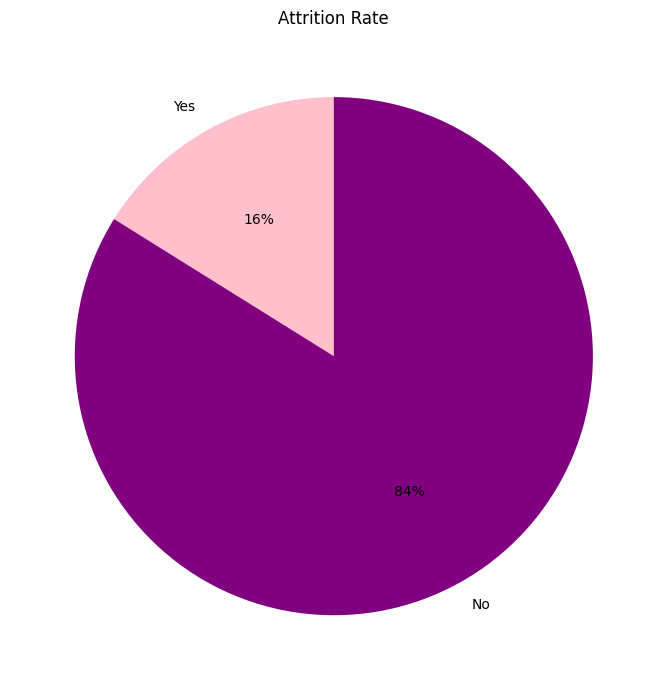

In [47]:
Stayed_Employees = Total_Employees - Attrition_count  # Employees who stayed
labels = ['Yes','No']
sizes = [Attrition_count, Stayed_Employees]
colors = ["pink", "purple"]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors)

# Add a title
plt.title('Attrition Rate')

# Show the plot
plt.tight_layout()
plt.show()

# Average Age

In [48]:
Average_Age = round(HR_Employee['Age'].mean())
Average_Age

29

# Average Salary

In [37]:
Average_Salary = HR_Employee['Salary'].mean()
Rounded_Salary = round(Average_Salary / 1000) 
print(f"{Rounded_Salary} K")

113 K


# OverTime:

In [38]:
OverTime_count = HR_Employee[HR_Employee['OverTime'] == 'Yes'].shape[0]
OverTime_count

416

In [39]:
OverTime_Rate = round((OverTime_count / Total_Employees) * 100)
OverTime_Rate
print(f"{OverTime_Rate}%")

28%


# Pie Chart with OverTime :

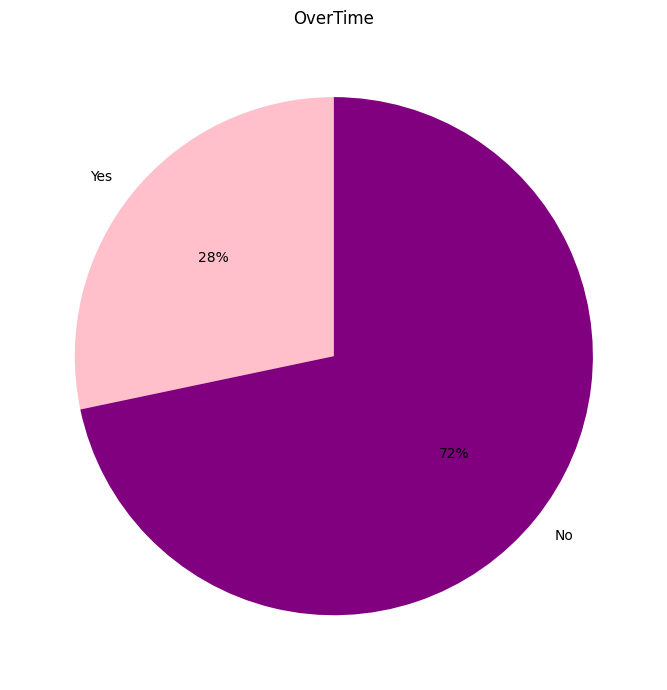

In [40]:
No_Over_Employees = Total_Employees - OverTime_count  # Employees who stayed
labels = ['Yes','No']
sizes = [OverTime_count, No_Over_Employees]
colors = ["pink", "purple"]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors)

# Add a title
plt.title('OverTime')

# Show the plot
plt.tight_layout()
plt.show()

# Employees By Gender:

In [49]:
Gender = HR_Employee.groupby('Gender')['EmployeeID'].count()
Gender_Percentage = ((Gender / Gender.sum()) * 100).round().astype(int)
Gender_Percentage

Gender
Female    46
Male      44
OTher     10
Name: EmployeeID, dtype: int64

# Bar Chart of Gender Distribution:

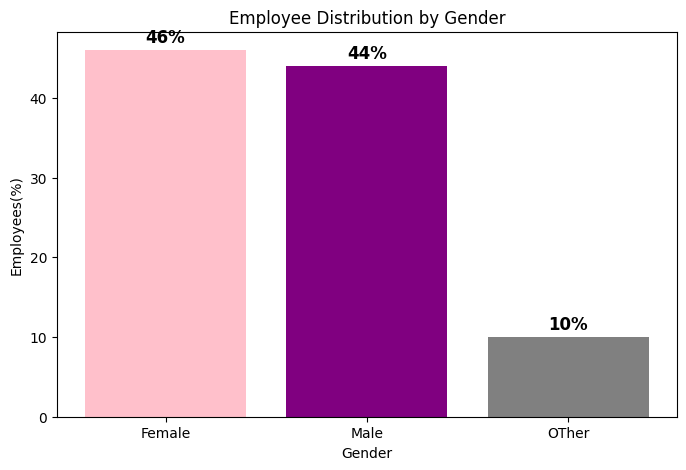

In [50]:
plt.figure(figsize=(8, 5))
plt.bar(Gender_Percentage.index, Gender_Percentage, color=['pink', 'purple', 'gray'])

# Add labels
plt.xlabel("Gender")
plt.ylabel("Employees(%)")
plt.title("Employee Distribution by Gender")

# Show percentage values on bars
for i, value in enumerate(Gender_Percentage):
    plt.text(i, value + 1, f"{value}%", ha='center', fontsize=12, fontweight='bold')

# Display the chart
plt.show()

# Employees By AgeRange:

In [51]:
AgeCount = HR_Employee.groupby('AgeRange')['EmployeeID'].count()
AgeCount 

AgeRange
18 - 30     955
30 - 40     289
40 - 50     225
Above 50      1
Name: EmployeeID, dtype: int64

# Bar Chart of Gender Distribution percentage :

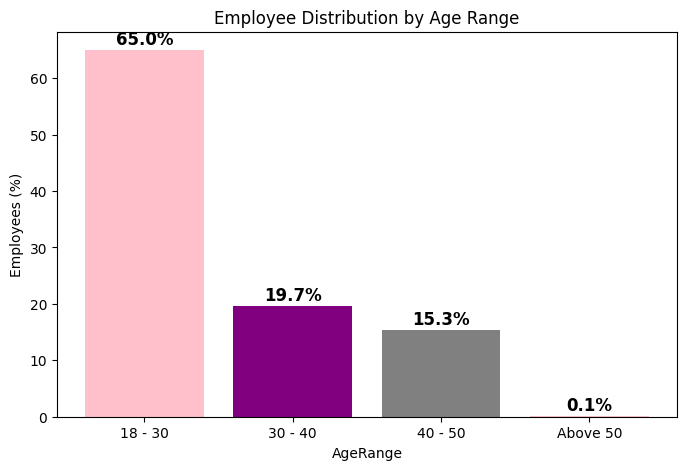

In [52]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution
age_distribution = HR_Employee['AgeRange'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
plt.bar(age_distribution.index, age_distribution, color=['pink', 'purple', 'gray'])

# Add labels
plt.xlabel("AgeRange")
plt.ylabel("Employees (%)")
plt.title("Employee Distribution by Age Range")

# Show percentage values on bars (formatted to 1 decimal place)
for i, value in enumerate(age_distribution):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Display the chart
plt.show()


# Employees will be promoted Due To High Performance And LastPromotion :

In [138]:
# Aggregate data per EmployeeID
agg_data = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "ManagerRating": "mean",  # Average Manager Rating
    "YearsSinceLastPromotion": "min",  # Minimum years since last promotion
    "JobRole": "first"  # Keep JobRole for grouping
})

# Apply the filtering conditions
filtered_data = agg_data[(agg_data["ManagerRating"] > 4) & (agg_data["YearsSinceLastPromotion"] > 4)]

# Create a Pivot Table to count employees per JobRole
Promoted_Employee = pd.pivot_table(
    filtered_data, 
    values="EmployeeID",  # Counting Employee IDs
    index="JobRole",      # Group by Job Role
    aggfunc="count"       # Count number of employees
)

# Display the Pivot Table
Promoted_Employee


,EmployeeID
JobRole,
Analytics Manager,1
Data Scientist,7
Engineering Manager,2
Machine Learning Engineer,3
Recruiter,3
Sales Executive,9
Sales Representative,1
Senior Software Engineer,3
Software Engineer,6


# Employees will be Retrenched Due To Low Performance And RecentRole :

In [74]:
# Aggregate data per EmployeeID
agg_data2 = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "ManagerRating": "mean",  # Average Manager Rating
    "YearsInMostRecentRole": "min",  # Minimum years since last promotion
    "JobRole": "first"  # Keep JobRole for grouping
})

# Apply the filtering conditions
filtered_data2 = agg_data2[(agg_data["ManagerRating"] < 3.5) & (agg_data2["YearsInMostRecentRole"] > 4)]

# Create a Pivot Table to count employees per JobRole
Retrenched_Employee = pd.pivot_table(
    filtered_data2, 
    values="EmployeeID",  # Counting Employee IDs
    index="JobRole",      # Group by Job Role
    aggfunc="count"       # Count number of employees
)

# Display the Pivot Table
Retrenched_Employee


,EmployeeID
JobRole,
Analytics Manager,3
Data Scientist,25
Engineering Manager,7
HR Business Partner,2
HR Executive,4
HR Manager,1
Machine Learning Engineer,9
Manager,3
Recruiter,3


# Employee Will Be Retired In 2034 :

In [137]:
from datetime import datetime

# Calculate Age in 2034
HR_Emp["AgeIn2034"] = HR_Emp["Age"] + (2034 - datetime.now().year)

# Filter employees who will be 60 or older in 2034
Emp_Retiring = HR_Emp[HR_Emp["AgeIn2034"] >= 60][["EmployeeID","Age"]]

# Show results
print(Emp_Retiring.head())


     EmployeeID  Age
1185  08AC-30AB   51


# Performance Page:

# Top5 Employees:

In [43]:
import pandas as pd

# Assuming HR_Data is already loaded

# Step 1: Calculate the average ManagerRating per EmployeeID
AvgRating = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "ManagerRating": "mean",  # Average Manager Rating
    "EmployeeID": "first",   # Keep Employee Name for identification
    "Department" : "first",
    "JobRole" : "first"
})

# Step 2: Rank employees per Department and get the top 10
Top_employees = AvgRating.nlargest(5, "ManagerRating")

Top_employees


,ManagerRating,EmployeeID,Department,JobRole
21,5.0,0592-D909,Technology,Analytics Manager
65,5.0,0D8F-C0F3,Technology,Data Scientist
71,5.0,0F2B-3457,Sales,Sales Executive
77,5.0,1053-41B1,Technology,Data Scientist
190,5.0,2926-D386,Technology,Machine Learning Engineer


# Performance Per JobRole:
Recruiter , Data scientist , HR Executive , Software Engineer

In [53]:
job_role_performance = HR_Data.groupby('JobRole')['ManagerRating'].mean().reset_index()

# Sort in descending order
job_role_performance = job_role_performance.sort_values(by='ManagerRating', ascending=False)
job_role_performance



,JobRole,ManagerRating
8,Recruiter,3.554217
1,Data Scientist,3.535088
4,HR Executive,3.517647
12,Software Engineer,3.510504
6,Machine Learning Engineer,3.509761
2,Engineering Manager,3.478571
10,Sales Representative,3.463115
9,Sales Executive,3.440433
0,Analytics Manager,3.433155
11,Senior Software Engineer,3.419277


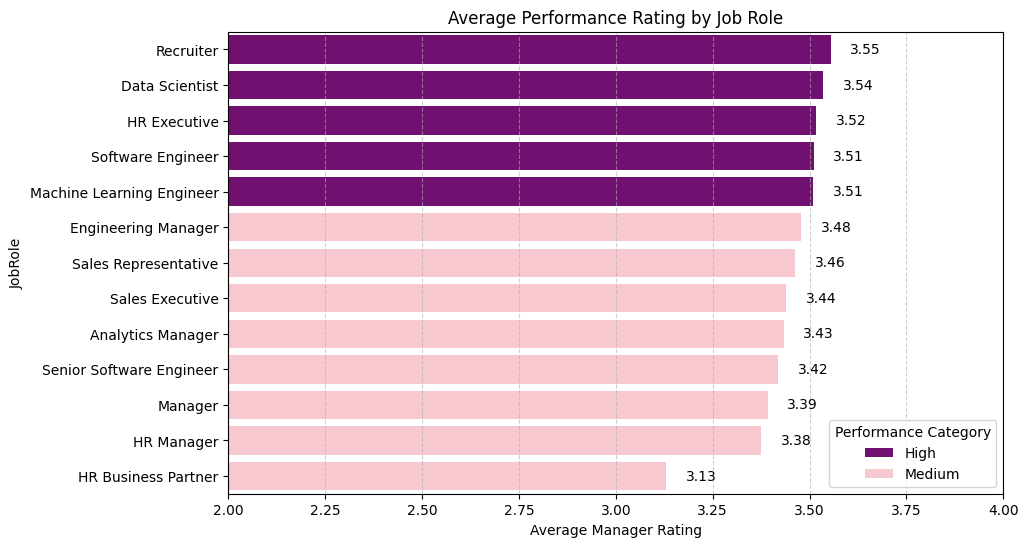

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
jobrole_performance = HR_Data.groupby("JobRole", as_index=False)["ManagerRating"].mean().sort_values(by="ManagerRating", ascending=False)

# Assign a performance category for hue
jobrole_performance["PerformanceCategory"] = jobrole_performance["ManagerRating"].apply(
    lambda x: "High" if x > 3.5 else "Low" if x < 2.5 else "Medium"
)

# Define color palette
palette = {"High": "Purple", "Medium": "Pink", "Low": "Gray"}

# Plot with hue and palette
plt.figure(figsize=(10, 6))
sns.barplot(
    data=jobrole_performance, 
    x="ManagerRating", 
    y="JobRole", 
    hue="PerformanceCategory",  # Hue is required for palette
    dodge=False,  # Ensures single bars per JobRole
    palette=palette  
)

# Formatting
plt.title("Average Performance Rating by Job Role")
plt.xlabel("Average Manager Rating")
plt.xlim(2, 4)
plt.legend(title="Performance Category", loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show values on bars
for index, value in enumerate(jobrole_performance["ManagerRating"]):
    plt.text(value + 0.05, index, f"{value:.2f}", va="center")

plt.show()


# Performance Due To Employees%:

In [56]:

# Group data by EmployeeID to get the highest ManagerRating per JobRole
MangAgg = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "JobRole": "first",  
    "ManagerRating": "max"  
})

# Create a pivot table to count employees per ManagerRating (2 to 5)
JobAggTable2 = MangAgg.pivot_table(
    index="JobRole", 
    columns="ManagerRating", 
    values="EmployeeID", 
    aggfunc="count",
    fill_value=0
)

# Add total count of employees per JobRole
JobAggTable2["Total"] = JobAggTable2.sum(axis=1)



# Sort pivot table in descending order based on the total count
JobAggTable2["Total"].sort_values(ascending=False).index

# Display the final sorted percentage pivot table
print(JobAggTable2)


ManagerRating               2   3   4    5  Total
JobRole                                          
Analytics Manager           3   8  14   21     46
Data Scientist              4  26  66  114    210
Engineering Manager         2  10  29   26     67
HR Business Partner         0   0   3    2      5
HR Executive                1   2   8   11     22
HR Manager                  0   0   1    2      3
Machine Learning Engineer   3  13  43   52    111
Manager                     1   2  12   15     30
Recruiter                   0   4   1   13     18
Sales Executive            11  28  91  130    260
Sales Representative        2   9  22   26     59
Senior Software Engineer    6  14  49   38    107
Software Engineer          10  27  76  118    231


# With Percentage:

In [57]:

# Group data by EmployeeID to get the highest ManagerRating per JobRole
MangAgg = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "JobRole": "first",  
    "ManagerRating": "max"  
})

# Create a pivot table to count employees per ManagerRating (2 to 5)
JobAggTable2 = MangAgg.pivot_table(
    index="JobRole", 
    columns="ManagerRating", 
    values="EmployeeID", 
    aggfunc="count",
    fill_value=0
)

# Add total count of employees per JobRole
JobAggTable2["Total"] = JobAggTable2.sum(axis=1)

# Convert counts to percentages per JobRole
JobAggTable2_Percentage = JobAggTable2.drop(columns="Total").div(JobAggTable2["Total"], axis=0) * 100
JobAggTable2_Percentage = JobAggTable2_Percentage.fillna(0).round(1)  # Handle NaN values and round

# Sort pivot table in descending order based on the total count
JobAggTable2_Percentage = JobAggTable2_Percentage.loc[JobAggTable2["Total"].sort_values(ascending=False).index]

# Display the final sorted percentage pivot table
print(JobAggTable2_Percentage)


ManagerRating                2     3     4     5
JobRole                                         
Sales Executive            4.2  10.8  35.0  50.0
Software Engineer          4.3  11.7  32.9  51.1
Data Scientist             1.9  12.4  31.4  54.3
Machine Learning Engineer  2.7  11.7  38.7  46.8
Senior Software Engineer   5.6  13.1  45.8  35.5
Engineering Manager        3.0  14.9  43.3  38.8
Sales Representative       3.4  15.3  37.3  44.1
Analytics Manager          6.5  17.4  30.4  45.7
Manager                    3.3   6.7  40.0  50.0
HR Executive               4.5   9.1  36.4  50.0
Recruiter                  0.0  22.2   5.6  72.2
HR Business Partner        0.0   0.0  60.0  40.0
HR Manager                 0.0   0.0  33.3  66.7


# Attrition Per JobRole:

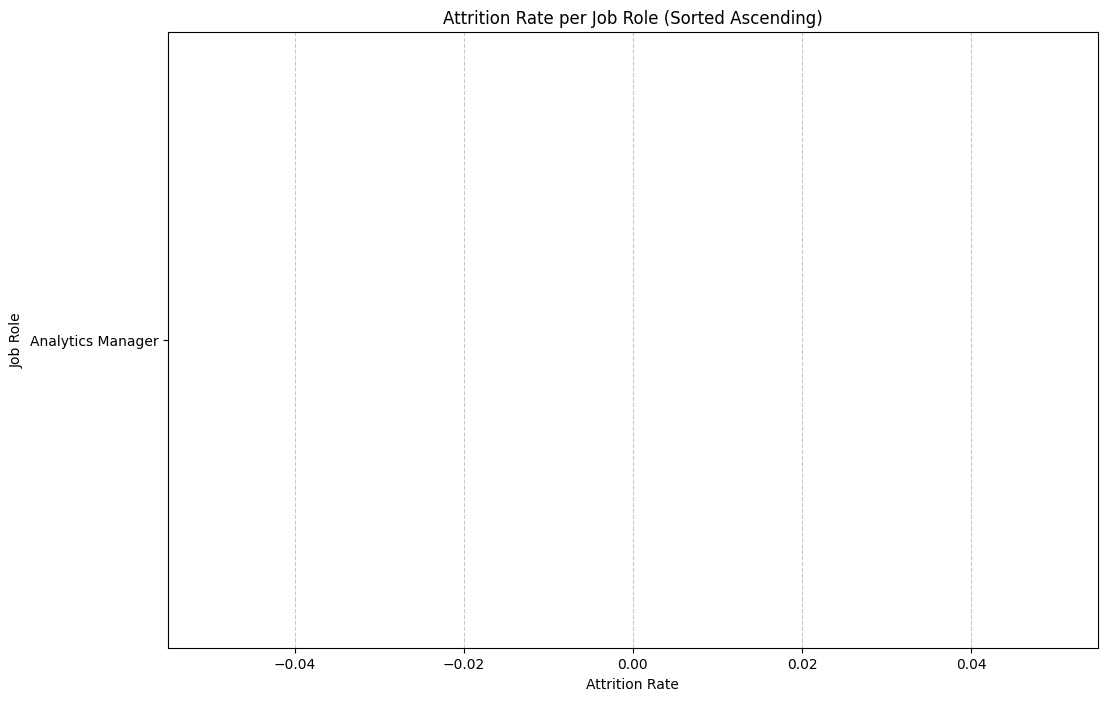

In [64]:

# Convert Attrition column to numeric (Yes -> 1, No -> 0)
HR_Emp['Attrition'] = HR_Emp['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate the attrition rate per JobRole
attrition_job= HR_Emp.groupby('JobRole')['Attrition'].mean().reset_index()

# Sort the job roles by attrition rate in ascending order
attrition_job_sorted = attrition_job.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_job_sorted

# Plot the sorted attrition rate per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_job_sorted['JobRole'], attrition_job_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('Job Role')
plt.title('Attrition Rate per Job Role (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

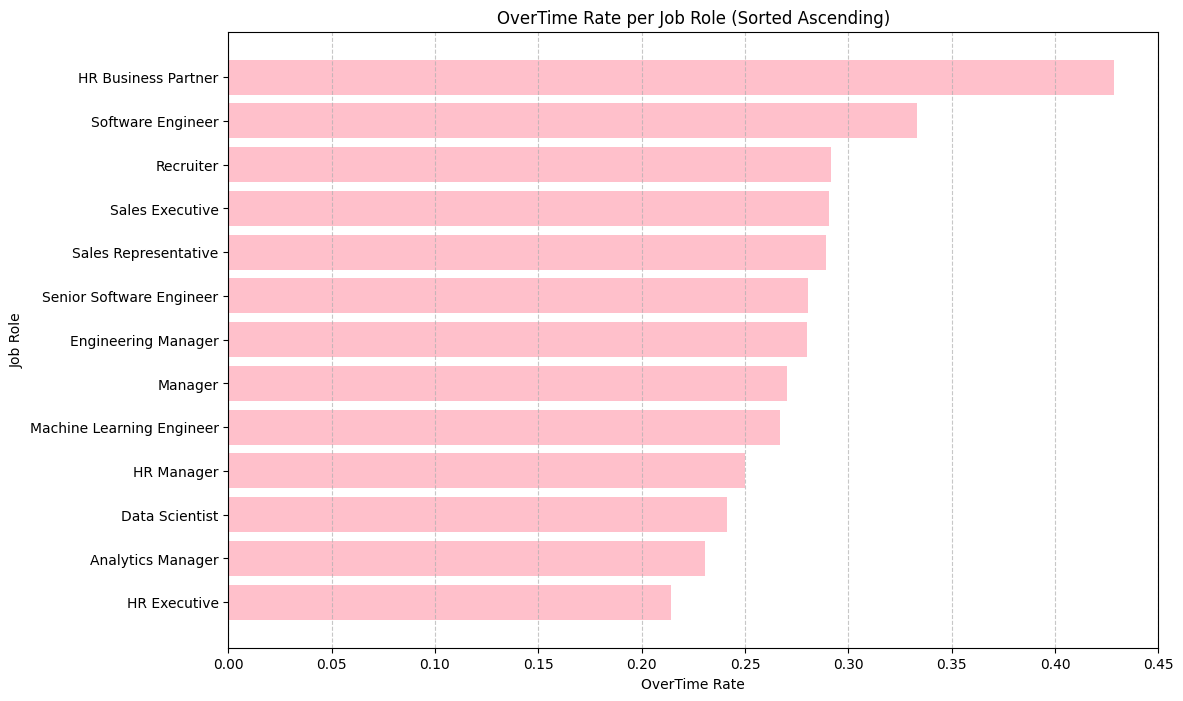

In [57]:

# Convert OverTime column to numeric (Yes -> 1, No -> 0)
HR_Emp['OverTime'] = HR_Emp['OverTime'].map({'Yes': 1, 'No': 0})

# Calculate the OverTime rate per JobRole
OverTime_rate = HR_Emp.groupby('JobRole')['OverTime'].mean().reset_index()

# Sort the job roles by attrition rate in ascending order
OverTime_rate_sorted = OverTime_rate.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_rate_sorted

# Plot the sorted OverTime rate per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_rate_sorted['JobRole'], OverTime_rate_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('Job Role')
plt.title('OverTime Rate per Job Role (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per JobRole :
Recruiter , Sales Representative , Software Engineer , Data scientist

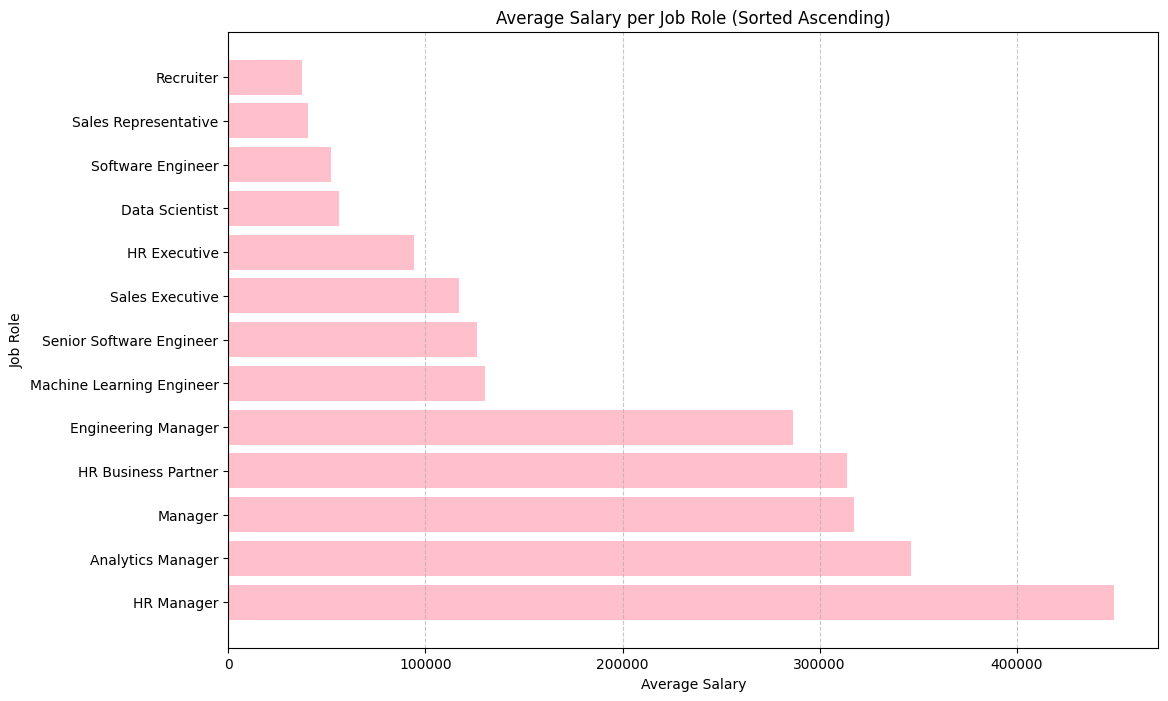

In [56]:
# Calculate the average salary per JobRole
average_salary = HR_Emp.groupby('JobRole')['Salary'].mean().reset_index()

# Sort the job roles by average salary in ascending order
average_salary_sorted = average_salary.sort_values(by='Salary', ascending=False)

# Display the sorted average salary
average_salary_sorted

# Plot the sorted average salary per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(average_salary_sorted['JobRole'], average_salary_sorted['Salary'], color='pink')
plt.xlabel('Average Salary')
plt.ylabel('Job Role')
plt.title('Average Salary per Job Role (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# JobSatisfaction Per jobRole :

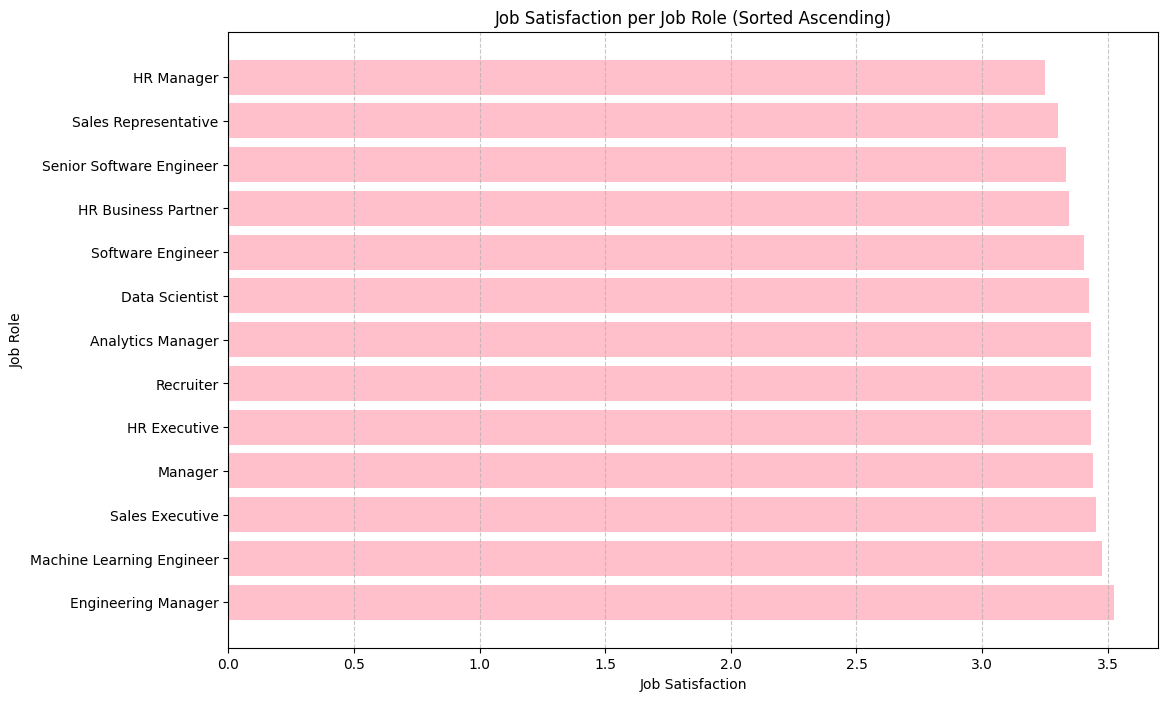

In [59]:
# Group by JobRole and calculate the average JobSatisfaction
jobRole_satisfaction = HR_Data.groupby('JobRole')['JobSatisfaction'].mean().reset_index()

# Sort the job roles by average JobSatisfaction in ascending order
jobRole_satisfaction_sorted = jobRole_satisfaction.sort_values(by='JobSatisfaction', ascending=False)

# Display the result
jobRole_satisfaction_sorted

# Plot the sorted average JobSatisfaction per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(jobRole_satisfaction_sorted['JobRole'], jobRole_satisfaction_sorted['JobSatisfaction'], color='pink')
plt.xlabel('Job Satisfaction')
plt.ylabel('Job Role')
plt.title('Job Satisfaction per Job Role (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition Per Department:

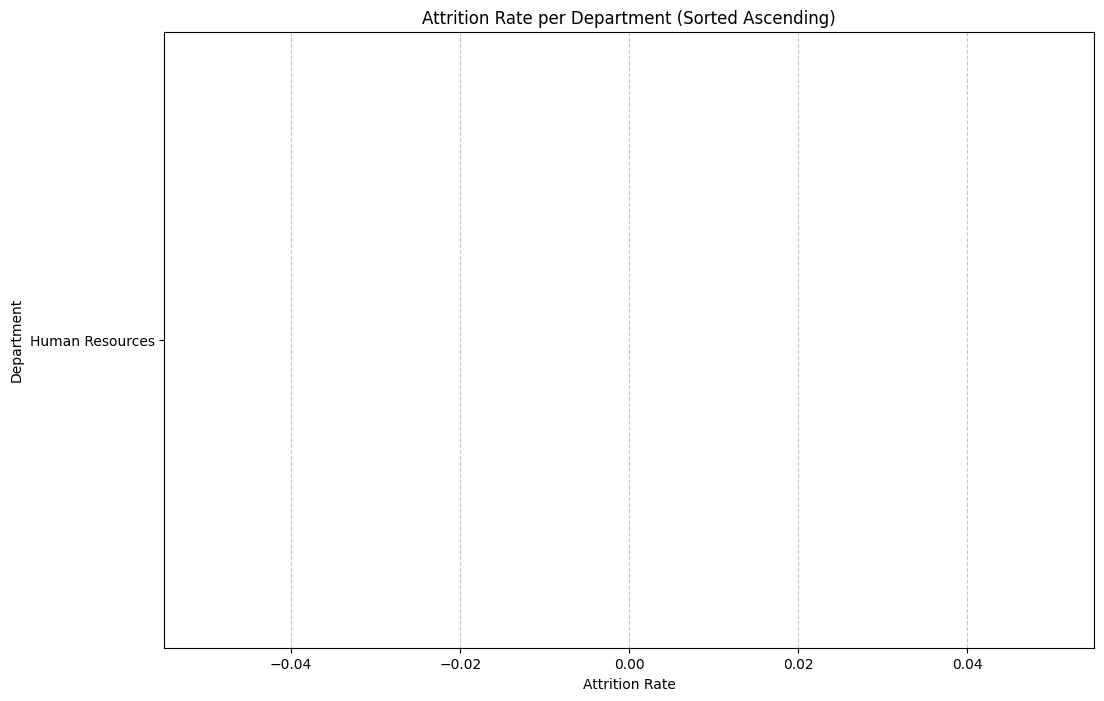

In [61]:
# Calculate the attrition rate per Department
attrition_dept= HR_Emp.groupby('Department')['Attrition'].mean().reset_index()

# Sort the Department by attrition rate in ascending order
attrition_dept_sorted = attrition_dept.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_dept_sorted

# Plot the sorted attrition rate per Department with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_dept_sorted['Department'], attrition_dept_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('Department')
plt.title('Attrition Rate per Department (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# OverTime Per Department:

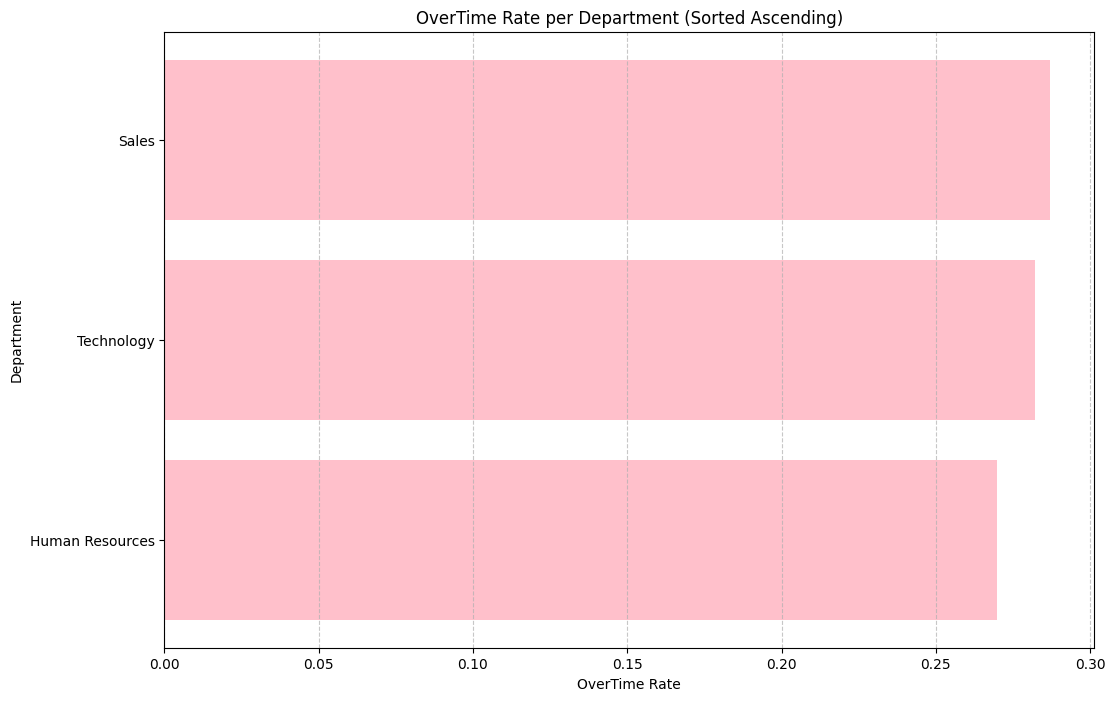

In [69]:
# Calculate the OverTime rate per Department
OverTime_Dept = HR_Emp.groupby('Department')['OverTime'].mean().reset_index()

# Sort the job roles by attrition rate in ascending order
OverTime_Dept_sorted = OverTime_Dept.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Dept_sorted

# Plot the sorted OverTime rate per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Dept_sorted['Department'], OverTime_Dept_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('Department')
plt.title('OverTime Rate per Department (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per Department:


In [178]:
Avg_SalaryByDept = HR_Employee.groupby('Department')['Salary'].mean().reset_index()
Avg_SalaryByDept

,Department,Salary
0,Human Resources,119698.809524
1,Sales,119117.609865
2,Technology,109655.122789


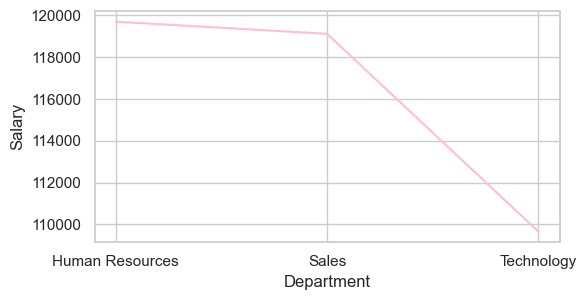

In [179]:
#Line Chart >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
plt.figure(figsize=(6,3))
sns.lineplot(x=Avg_SalaryByDept.Department, y=Avg_SalaryByDept.Salary, color='pink')
plt.show()

# Attrition Per BuisnessTravel:

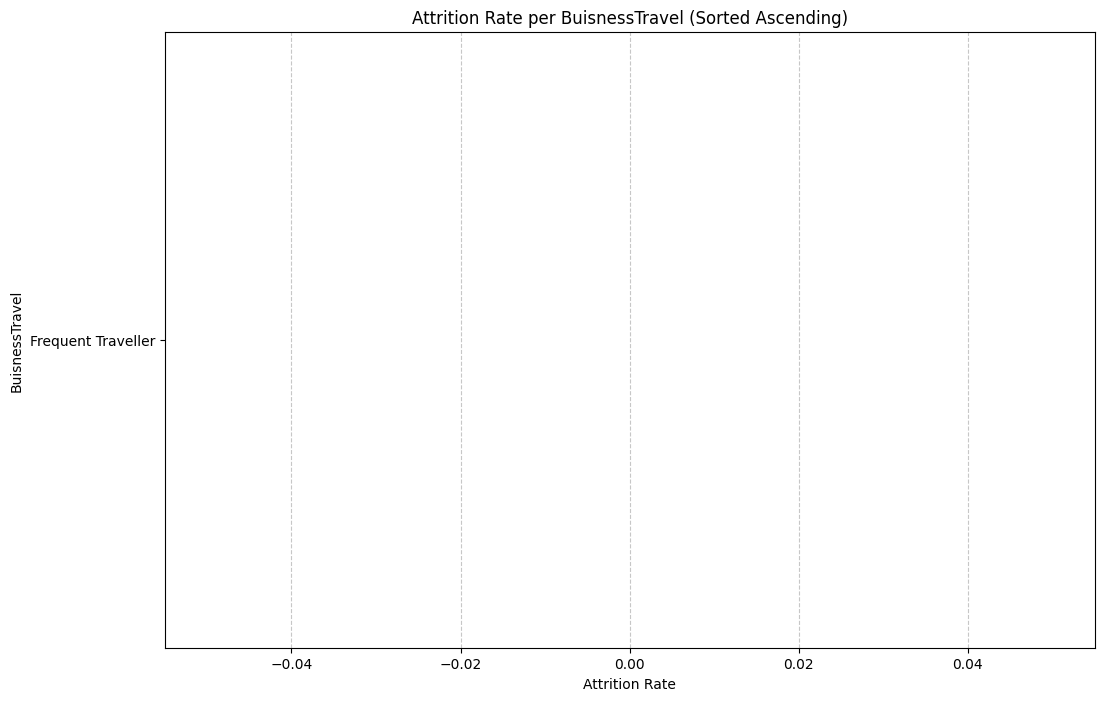

In [67]:

# Calculate the attrition rate per JobRole
attrition_buisness= HR_Emp.groupby('BusinessTravel')['Attrition'].mean().reset_index()

# Sort the BuisnessTravel by attrition rate in ascending order
attrition_buisness_sorted = attrition_buisness.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_buisness_sorted

# Plot the sorted attrition rate per BuisnessTravel with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_buisness_sorted['BusinessTravel'], attrition_buisness_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('BuisnessTravel')
plt.title('Attrition Rate per BuisnessTravel (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# OverTime Per BuisnessTravel:

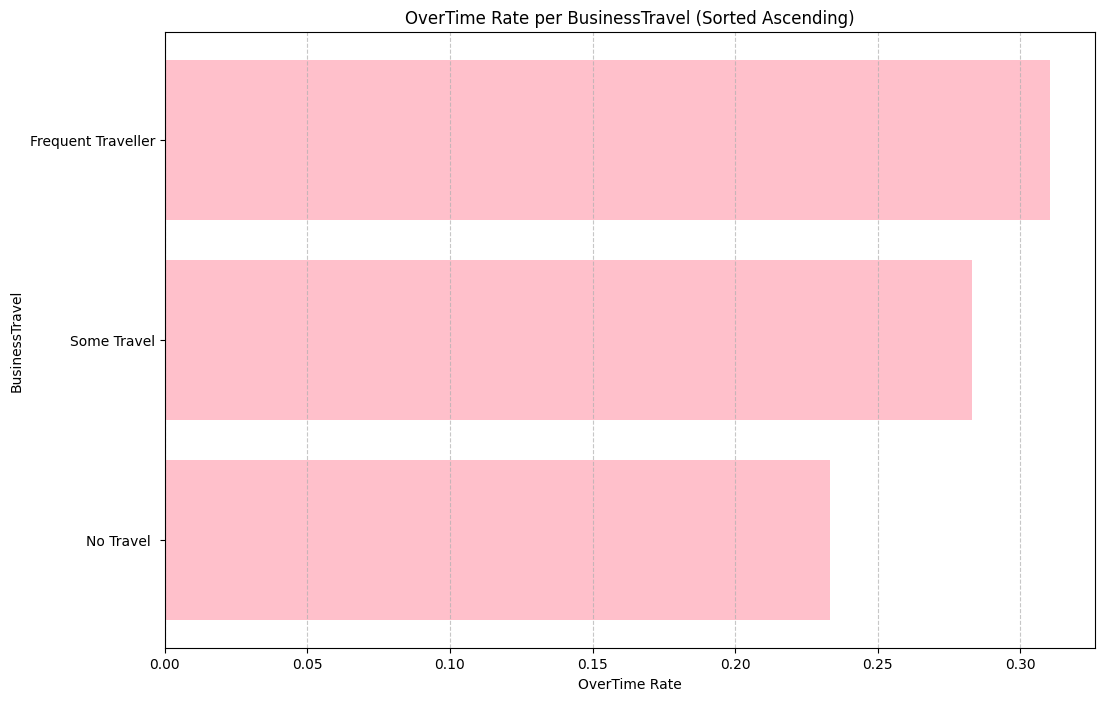

In [70]:
# Calculate the OverTime rate per BusinessTravel
OverTime_Business = HR_Emp.groupby('BusinessTravel')['OverTime'].mean().reset_index()

# Sort the BusinessTravel by attrition rate in ascending order
OverTime_Business_sorted = OverTime_Business.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Business_sorted

# Plot the sorted OverTime rate per BusinessTravel with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Business_sorted['BusinessTravel'], OverTime_Business_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('BusinessTravel')
plt.title('OverTime Rate per BusinessTravel (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition Per MaritalStatus:

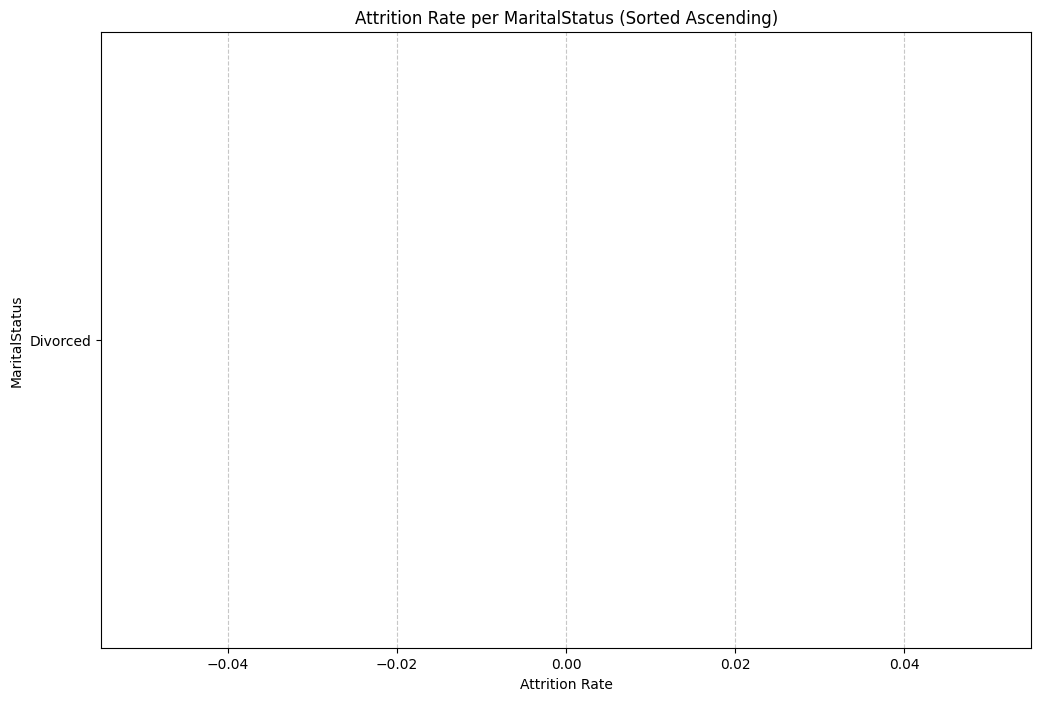

In [73]:
# Calculate the attrition rate per MaritalStatus
attrition_Marital= HR_Emp.groupby('MaritalStatus')['Attrition'].mean().reset_index()

# Sort the BuisnessTravel by attrition rate in ascending order
attrition_Marital_sorted = attrition_Marital.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Marital_sorted

# Plot the sorted attrition rate per BuisnessTravel with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Marital_sorted['MaritalStatus'], attrition_Marital_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('MaritalStatus')
plt.title('Attrition Rate per MaritalStatus (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per MaritalStatus:

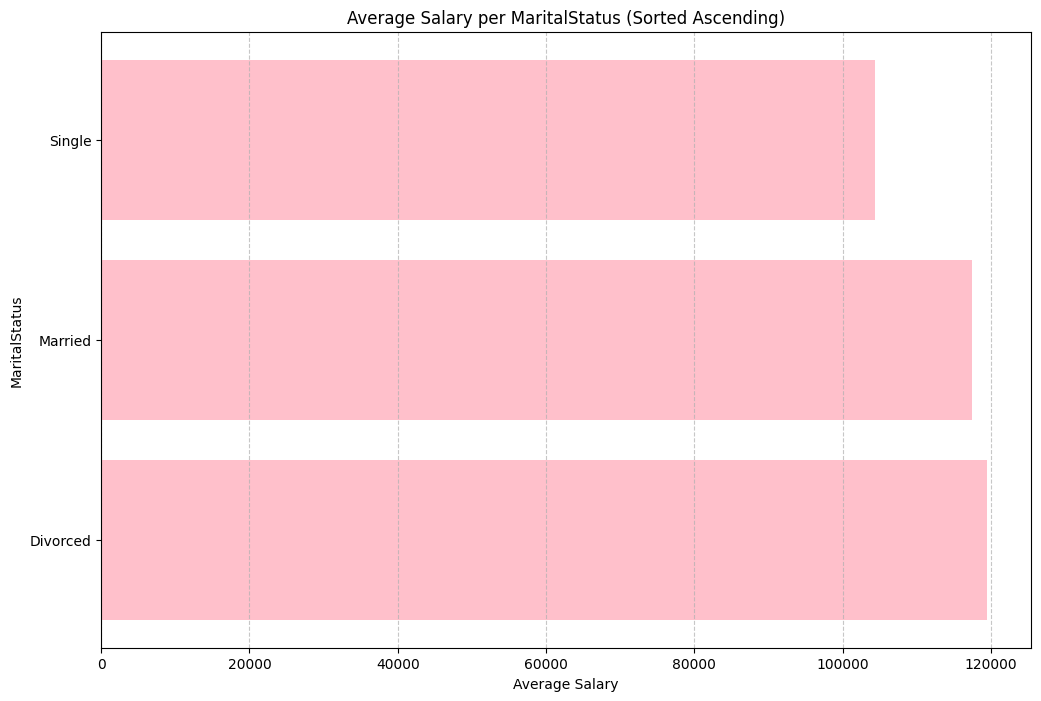

In [74]:
# Calculate the average salary per JobRole
average_salary_Marital = HR_Emp.groupby('MaritalStatus')['Salary'].mean().reset_index()

# Sort the job roles by average salary in ascending order
average_salary_Marital_sorted = average_salary_Marital.sort_values(by='Salary', ascending=False)

# Display the sorted average salary
average_salary_Marital_sorted

# Plot the sorted average salary per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(average_salary_Marital_sorted['MaritalStatus'], average_salary_Marital_sorted['Salary'], color='pink')
plt.xlabel('Average Salary')
plt.ylabel('MaritalStatus')
plt.title('Average Salary per MaritalStatus (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition Per EducationField:

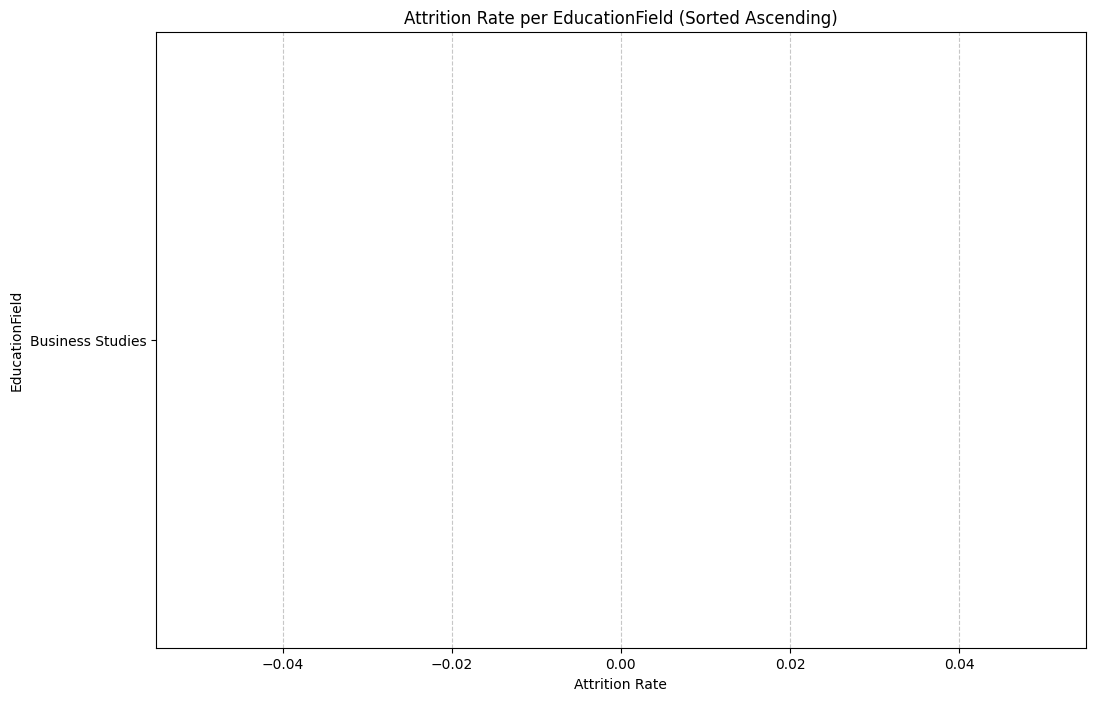

In [76]:
# Calculate the attrition rate per EducationField
attrition_Field= HR_Emp.groupby('EducationField')['Attrition'].mean().reset_index()

# Sort the EducationField by attrition rate in ascending order
attrition_Field_sorted = attrition_Field.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Field_sorted

# Plot the sorted attrition rate per EducationField with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Field_sorted['EducationField'], attrition_Field_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('EducationField')
plt.title('Attrition Rate per EducationField (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per EducationField :


In [77]:
Avg_SalaryByEduField = HR_Emp.groupby('EducationField')['Salary'].mean().reset_index().sort_values(by='Salary',ascending=False)
Avg_SalaryByEduField

,EducationField,Salary
3,Human Resources,145565.851852
5,Marketing,124277.609231
4,Information Systems,114380.537190
2,Economics,112219.851485
1,Computer Science,109353.993182
0,Business Studies,98406.670213
6,Other,96341.853659
7,Technical Degree,94873.552632


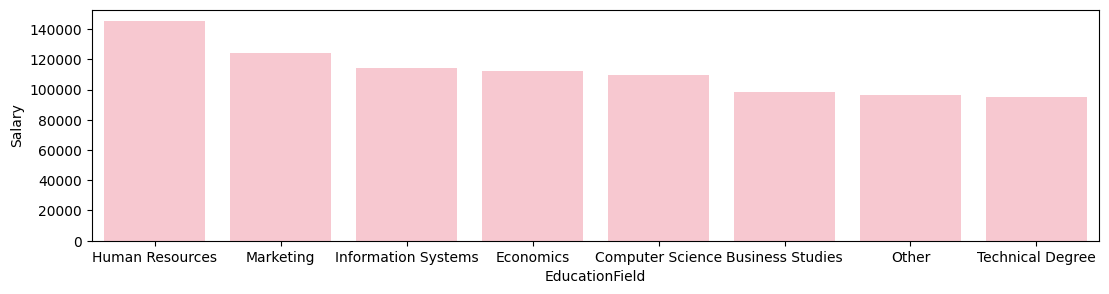

In [78]:
plt.figure(figsize=(13,3))
sns.barplot(x=Avg_SalaryByEduField.EducationField, y=Avg_SalaryByEduField.Salary, color='pink')
plt.show()

# OverTime Per EducationField:

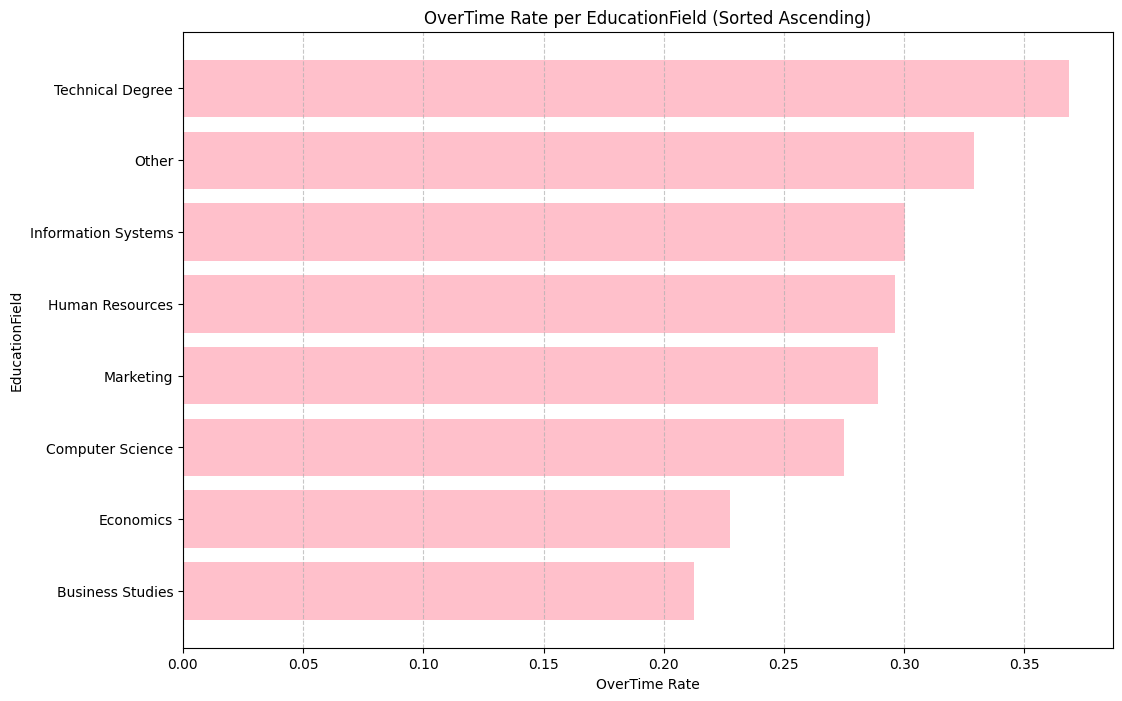

In [79]:
# Calculate the OverTime rate per EducationField
OverTime_Field = HR_Emp.groupby('EducationField')['OverTime'].mean().reset_index()

# Sort the EducationField by attrition rate in ascending order
OverTime_Field_sorted = OverTime_Field.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Field_sorted

# Plot the sorted OverTime rate per EducationField with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Field_sorted['EducationField'], OverTime_Field_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('EducationField')
plt.title('OverTime Rate per EducationField (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary By EducationLevel  


In [85]:
Avg_SalaryByEduLevel = HR_Employee.groupby('EducationLevel')['Salary'].mean().reset_index().sort_values(by='Salary',ascending=False)
Avg_SalaryByEduLevel

,EducationLevel,Salary
1,Doctorate,154268.791667
3,Masters,117641.057789
0,Bachelors,115405.430070
2,High School,105180.535461
4,No Formal Qualifications,94983.482353


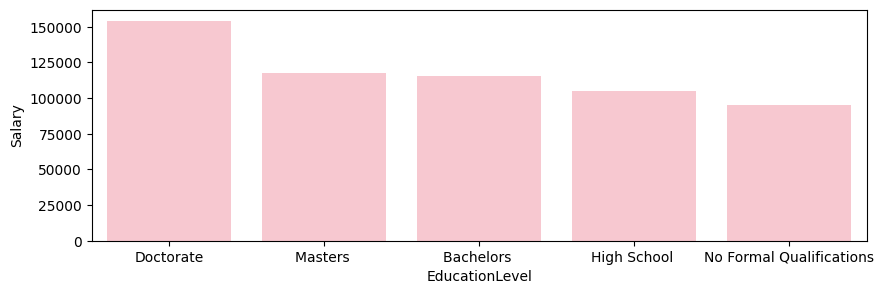

In [86]:
plt.figure(figsize=(10,3))
sns.barplot(x=Avg_SalaryByEduLevel.EducationLevel,y=Avg_SalaryByEduLevel.Salary,color='pink')
plt.show()

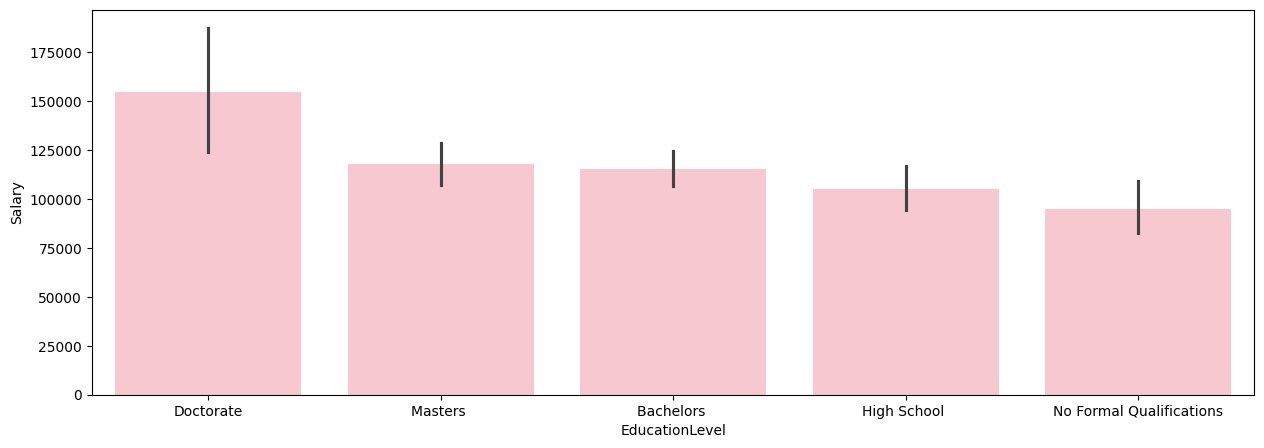

In [14]:
plt.figure(figsize=(15, 5))
sns.barplot(x=HR_Employee.EducationLevel, y=HR_Employee.Salary, data=HR_Employee, color="pink")
plt.show()

# Attrition Per Gender :

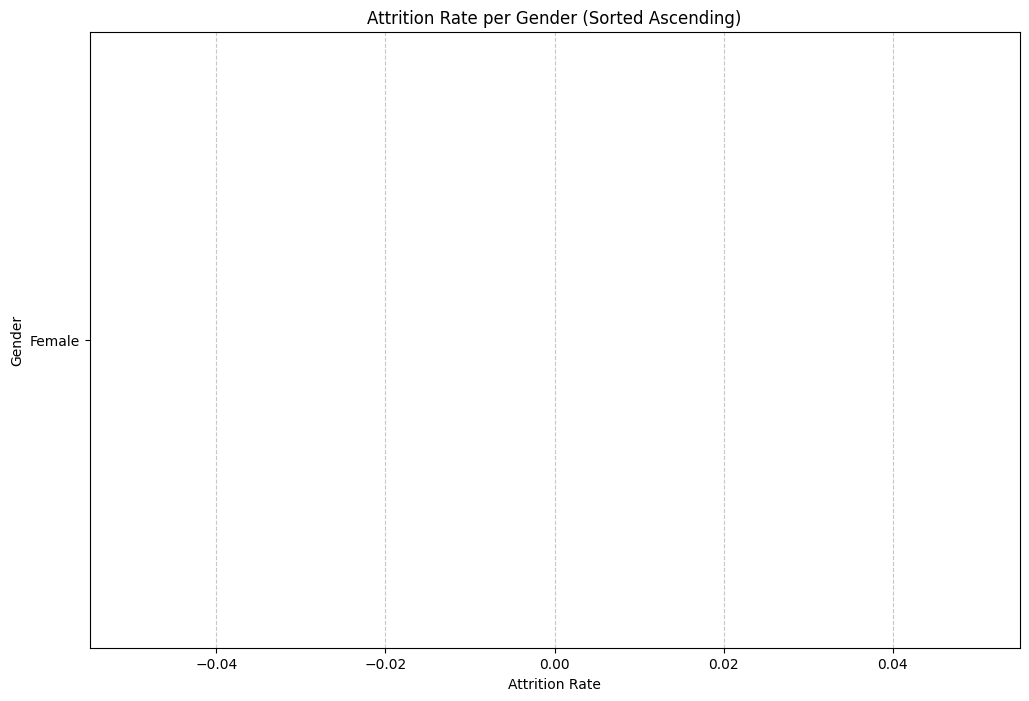

In [90]:
# Calculate the attrition rate per Gender
attrition_Gender= HR_Emp.groupby('Gender')['Attrition'].mean().reset_index()

# Sort the EducationField by attrition rate in ascending order
attrition_Gender_sorted = attrition_Gender.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Gender_sorted

# Plot the sorted attrition rate per EducationField with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Gender_sorted['Gender'], attrition_Gender_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('Gender')
plt.title('Attrition Rate per Gender (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

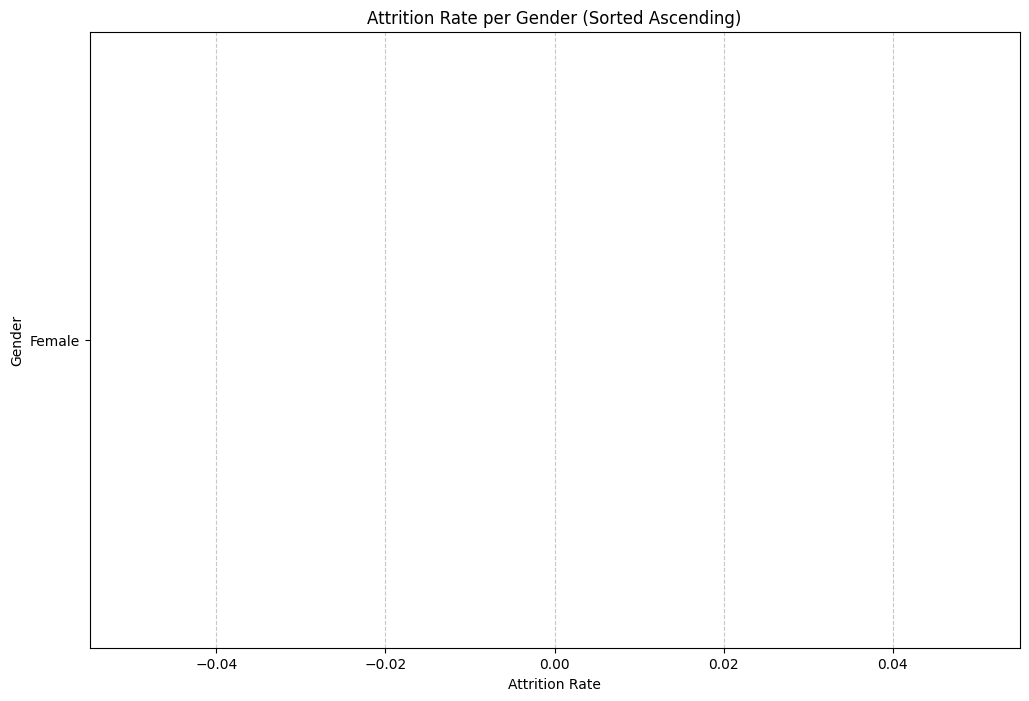

In [90]:
# Calculate the attrition rate per YearsaAtCompany
attrition_Years1= HR_Emp.groupby('YearsaAtCompany')['Attrition'].mean().reset_index()

# Sort the YearsaAtCompany by attrition rate in ascending order
attrition_Years_sorted = attrition_Years1.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Years_sorted

# Plot the sorted attrition rate per YearsaAtCompany with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Years_sorted['YearsaAtCompany'], attrition_Years_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('YearsaAtCompany')
plt.title('Attrition Rate per YearsaAtCompany (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

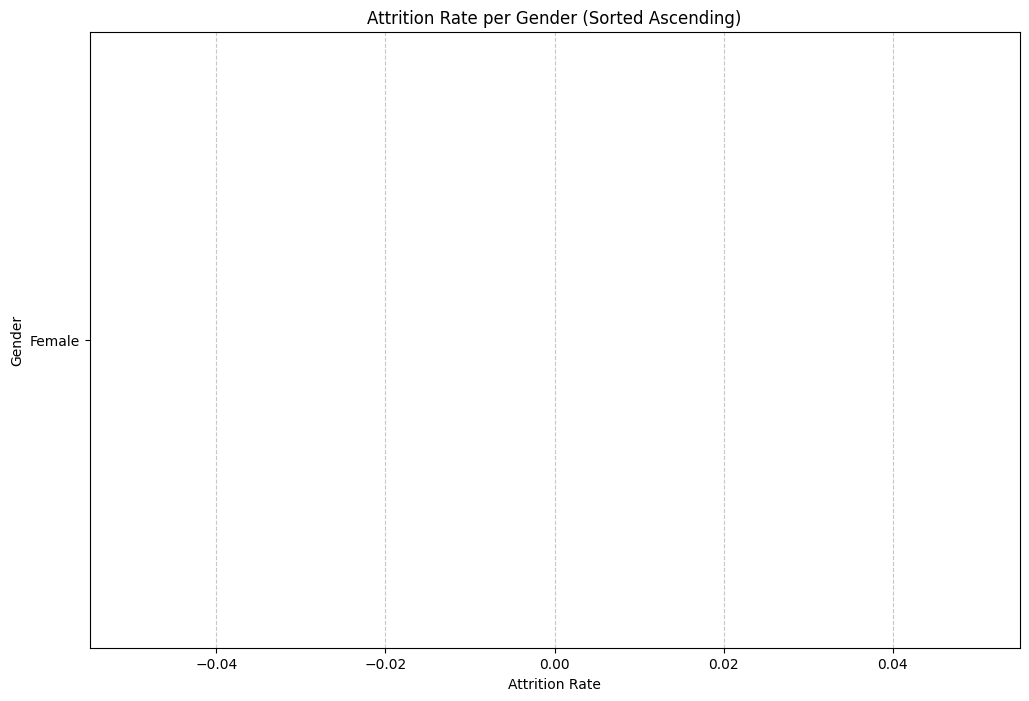

In [90]:
# Calculate the attrition rate per YearsWithCurrentManager
attrition_Years2= HR_Emp.groupby('YearsWithCurrentManager')['Attrition'].mean().reset_index()

# Sort the YearsWithCurrentManager by attrition rate in ascending order
attrition_Years2_sorted = attrition_Years2.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Years2_sorted

# Plot the sorted attrition rate per YearsWithCurrentManager with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Years2_sorted['YearsWithCurrentManager'], attrition_Years2_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('YearsWithCurrentManager')
plt.title('Attrition Rate per YearsWithCurrentManager (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

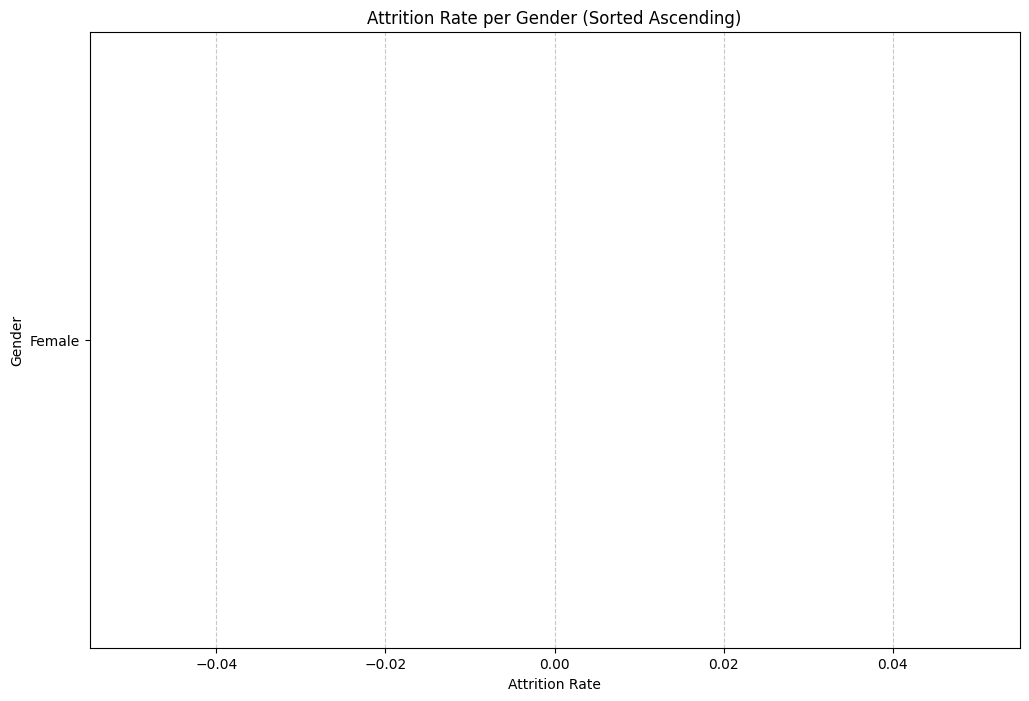

In [90]:
# Calculate the attrition rate per YearsSinceLastPromotion
attrition_Years3= HR_Emp.groupby('YearsSinceLastPromotion')['Attrition'].mean().reset_index()

# Sort the YearsSinceLastPromotion by attrition rate in ascending order
attrition_Years3_sorted = attrition_Years3.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Years3_sorted

# Plot the sorted attrition rate per YearsSinceLastPromotion with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Years3_sorted['YearsSinceLastPromotion'], attrition_Years3_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('YearsSinceLastPromotion')
plt.title('Attrition Rate per YearsSinceLastPromotion (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

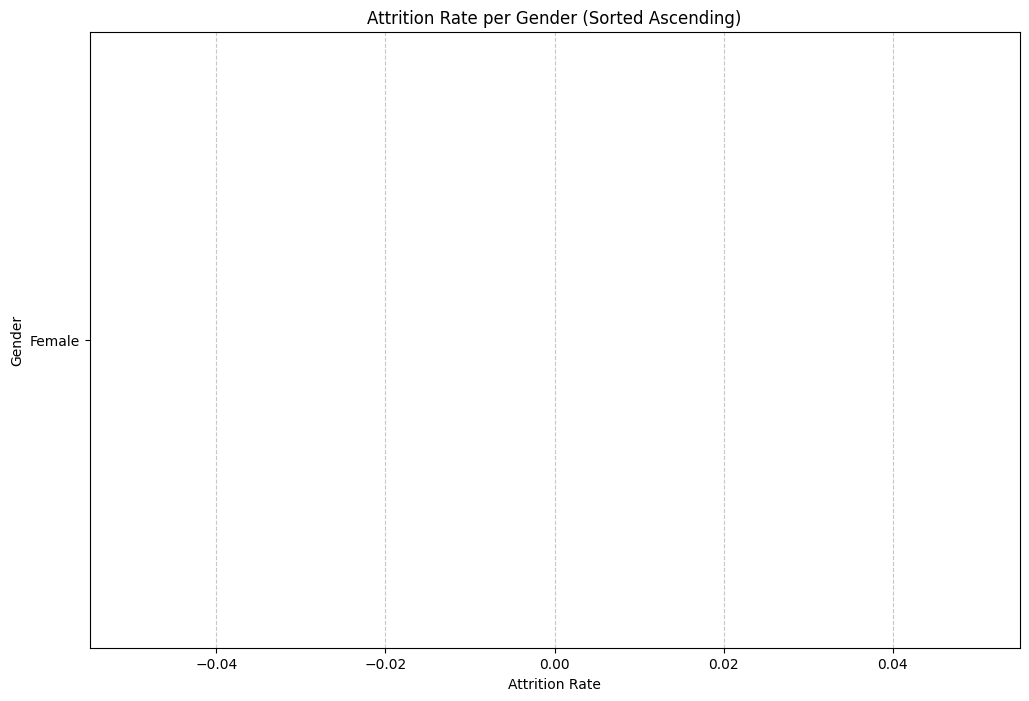

In [90]:
# Calculate the attrition rate per StockOptionLevel
attrition_Years4= HR_Emp.groupby('StockOptionLevel')['Attrition'].mean().reset_index()

# Sort the StockOptionLevel by attrition rate in ascending order
attrition_Years4_sorted = attrition_Years4.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Years4_sorted

# Plot the sorted attrition rate per StockOptionLevel with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Years4_sorted['StockOptionLevel'], attrition_Years4_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('StockOptionLevel')
plt.title('Attrition Rate per StockOptionLevel (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# OverTime Per Gender:

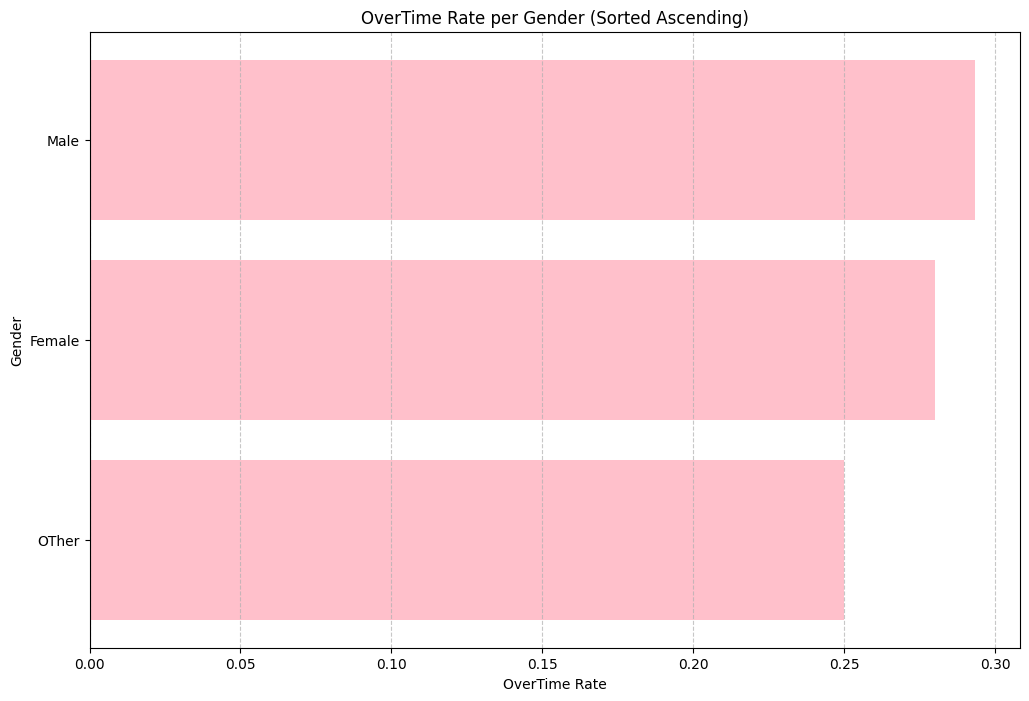

In [89]:
# Calculate the OverTime rate per Gender
OverTime_Gender = HR_Emp.groupby('Gender')['OverTime'].mean().reset_index()

# Sort the Gender by attrition rate in ascending order
OverTime_Gender_sorted = OverTime_Gender.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Gender_sorted

# Plot the sorted OverTime rate per EducationField with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Gender_sorted['Gender'], OverTime_Gender_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('Gender')
plt.title('OverTime Rate per Gender (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per Gender:


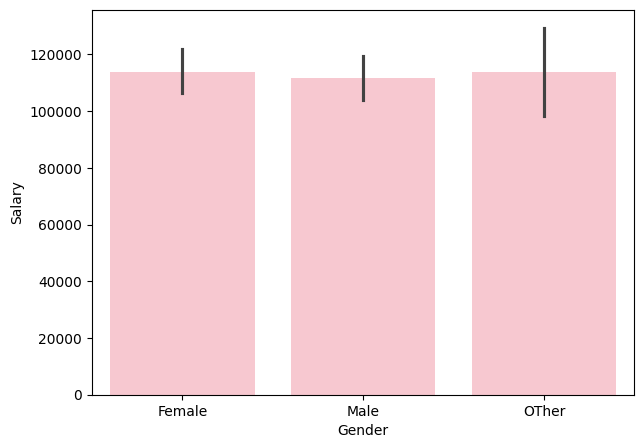

In [34]:
plt.figure(figsize=(7, 5))
sns.barplot(x=HR_Emp.Gender, y=HR_Emp.Salary, data=HR_Emp , color='pink')
plt.show()

# Performance Correlation :

In [49]:
# Select relevant columns for correlation analysis
columns_of_interest = ['ManagerRating', 'WorkLifeBalance', 'SelfRating', 
                       'EnvironmentSatisfaction', 'JobSatisfaction', 
                       'RelationshipSatisfaction', 'TrainingOpportunitiesTaken','Salary']

# Calculate the correlation matrix
correlation_matrix = HR_Data[columns_of_interest].corr()
correlation_matrix


,ManagerRating,WorkLifeBalance,SelfRating,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesTaken,Salary
ManagerRating,1.000000,-0.004092,0.851888,-0.006449,-0.013415,0.017715,0.005845,-0.007987
WorkLifeBalance,-0.004092,1.000000,0.006320,0.098539,0.049810,0.062818,0.005776,-0.004019
SelfRating,0.851888,0.006320,1.000000,-0.006408,-0.009865,0.020602,0.007936,-0.015496
EnvironmentSatisfaction,-0.006449,0.098539,-0.006408,1.000000,0.107720,0.108563,-0.019216,-0.012903
JobSatisfaction,-0.013415,0.049810,-0.009865,0.107720,1.000000,0.059435,-0.000684,0.019146
RelationshipSatisfaction,0.017715,0.062818,0.020602,0.108563,0.059435,1.000000,-0.018017,0.006771
TrainingOpportunitiesTaken,0.005845,0.005776,0.007936,-0.019216,-0.000684,-0.018017,1.000000,0.015312
Salary,-0.007987,-0.004019,-0.015496,-0.012903,0.019146,0.006771,0.015312,1.000000


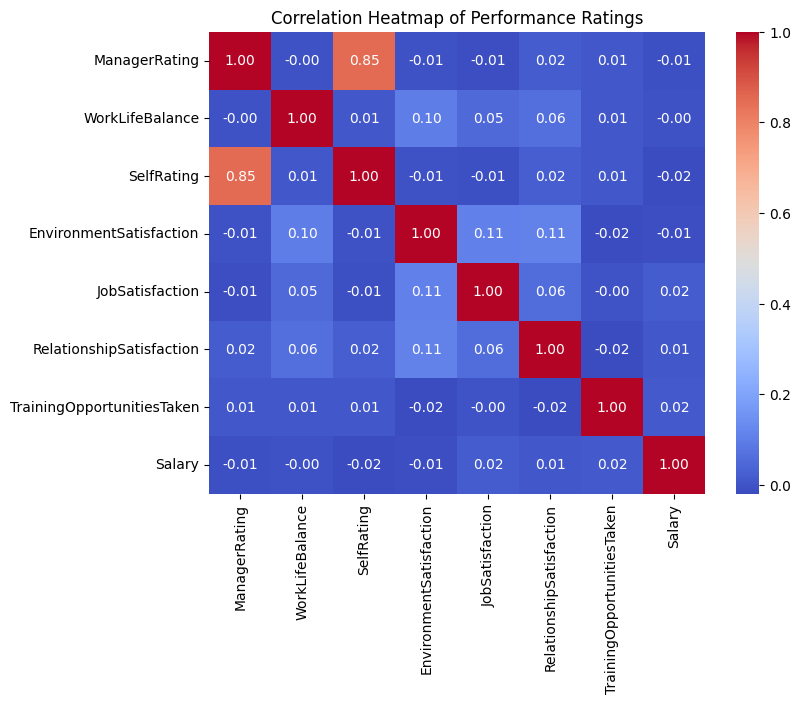

In [50]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Performance Ratings')
plt.show()

# Attrition Correlation :

In [51]:
#Convert Attrition to integer
HR_Data['Attrition'] = HR_Data['Attrition'].map({'Yes': 1, 'No': 0}).astype(int)
HR_Data['OverTime'] = HR_Data['OverTime'].map({'Yes': 1, 'No': 0}).astype(int)

# Select relevant columns for correlation analysis
columns_of_interest = [
    'Attrition', 'Salary', 'Age', 'OverTime', 'StockOptionLevel', 
    'YearsWithCurrManager', 'YearsSinceLastPromotion', 'JobSatisfaction', 
    'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance'
]

# Filter the DataFrame to include only the columns of interest
correlation_df = HR_Data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()
correlation_matrix

,Attrition,Salary,Age,OverTime,StockOptionLevel,YearsWithCurrManager,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance
Attrition,1.000000,-0.128804,-0.150090,0.260247,-0.093814,-0.187522,-0.286499,0.010212,0.000543,0.011623,0.016621
Salary,-0.128804,1.000000,0.319400,0.034241,-0.030398,0.048465,0.078417,0.019146,-0.012903,0.006771,-0.004019
Age,-0.150090,0.319400,1.000000,-0.046224,-0.003667,0.348875,0.454582,0.017348,0.006909,0.016085,-0.005808
OverTime,0.260247,0.034241,-0.046224,1.000000,0.000268,-0.060971,-0.062532,0.020096,-0.008782,0.025656,-0.001364
StockOptionLevel,-0.093814,-0.030398,-0.003667,0.000268,1.000000,0.051092,-0.016164,0.001577,0.012143,0.008528,0.014006
YearsWithCurrManager,-0.187522,0.048465,0.348875,-0.060971,0.051092,1.000000,0.354790,0.007252,0.030641,0.013144,-0.024351
YearsSinceLastPromotion,-0.286499,0.078417,0.454582,-0.062532,-0.016164,0.354790,1.000000,0.010017,0.036064,0.013491,0.023880
JobSatisfaction,0.010212,0.019146,0.017348,0.020096,0.001577,0.007252,0.010017,1.000000,0.107720,0.059435,0.049810
EnvironmentSatisfaction,0.000543,-0.012903,0.006909,-0.008782,0.012143,0.030641,0.036064,0.107720,1.000000,0.108563,0.098539
RelationshipSatisfaction,0.011623,0.006771,0.016085,0.025656,0.008528,0.013144,0.013491,0.059435,0.108563,1.000000,0.062818


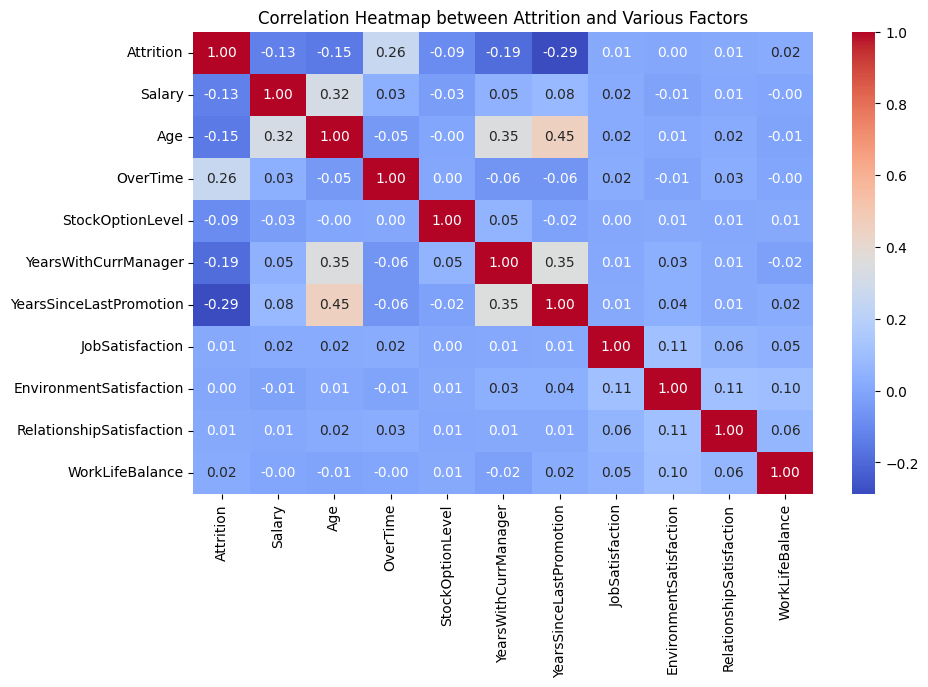

In [52]:

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Attrition and Various Factors')
plt.show()

# TrainingTaken VS Performance :

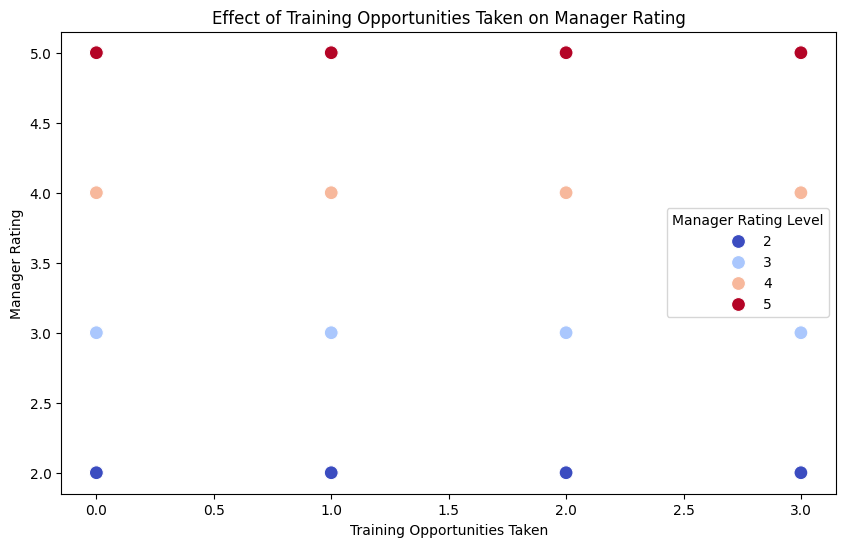

In [55]:
# Create a scatter plot to visualize the effect of TrainingOpportunitiesTaken on ManagerRating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Data, x='TrainingOpportunitiesTaken', y='ManagerRating', hue='ManagerRating', palette='coolwarm', s=100)

# Add titles and labels
plt.title('Effect of Training Opportunities Taken on Manager Rating')
plt.xlabel('Training Opportunities Taken')
plt.ylabel('Manager Rating')
plt.legend(title='Manager Rating Level')

# Show the plot
plt.show()

# WorkLifeBalance VS Performance :

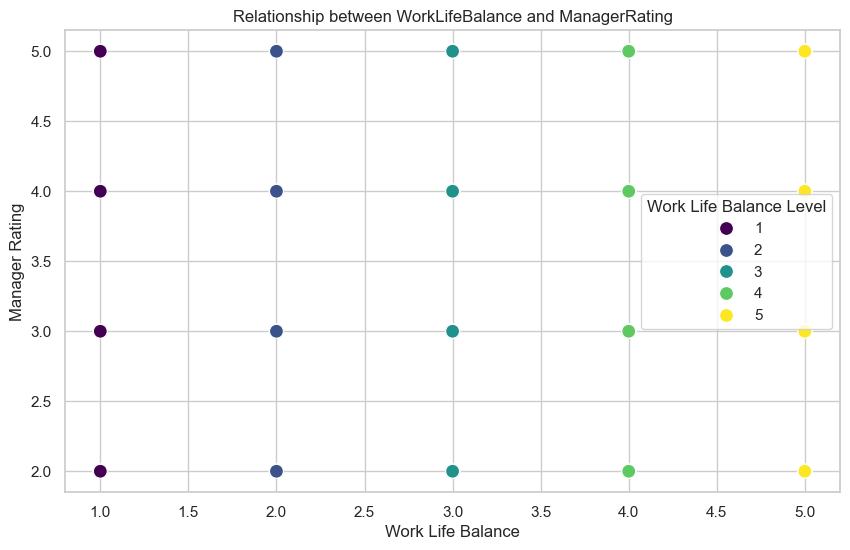

In [56]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a scatter plot to visualize the relationship between WorkLifeBalance and ManagerRating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Data, x='WorkLifeBalance', y='ManagerRating', hue='WorkLifeBalance', palette='viridis', s=100)

# Add titles and labels
plt.title('Relationship between WorkLifeBalance and ManagerRating')
plt.xlabel('Work Life Balance')
plt.ylabel('Manager Rating')
plt.legend(title='Work Life Balance Level')

# Show the plot
plt.show()

# SelfRating VS ManagerRating :

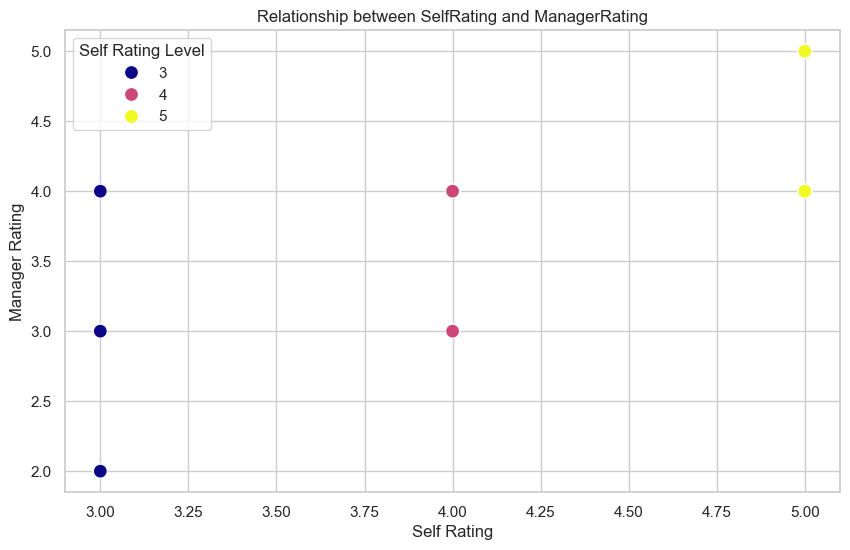

In [57]:
# Create a scatter plot to visualize the relationship between SelfRating and ManagerRating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Data, x='SelfRating', y='ManagerRating', hue='SelfRating', palette='plasma', s=100)

# Add titles and labels
plt.title('Relationship between SelfRating and ManagerRating')
plt.xlabel('Self Rating')
plt.ylabel('Manager Rating')
plt.legend(title='Self Rating Level')

# Show the plot
plt.show()

# RelationShipSatisfaction VS ManagerRating :

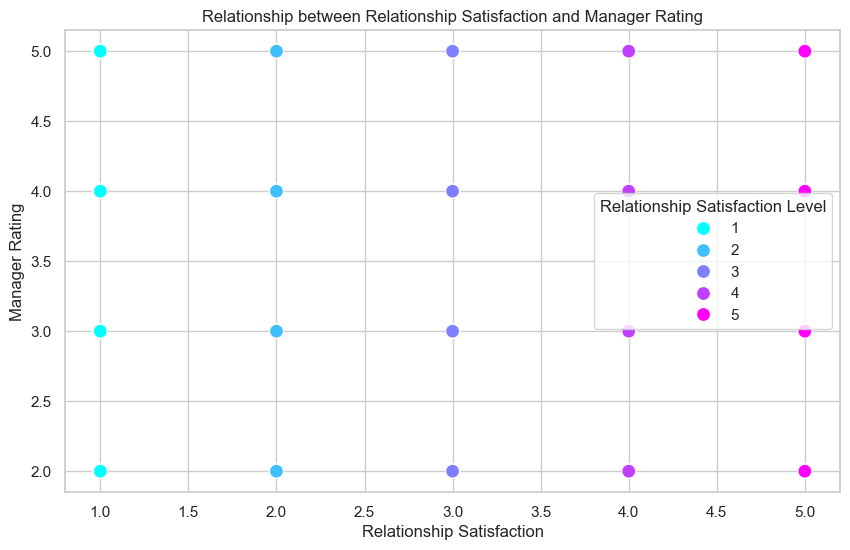

In [61]:
# Create a scatter plot to visualize the relationship between RelationShipSatisfaction and ManagerRating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Data, x='RelationshipSatisfaction', y='ManagerRating', hue='RelationshipSatisfaction', palette='cool', s=100)

# Add titles and labels
plt.title('Relationship between Relationship Satisfaction and Manager Rating')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Manager Rating')
plt.legend(title='Relationship Satisfaction Level')

# Show the plot
plt.show()

# JobSatisfaction Vs Performance :

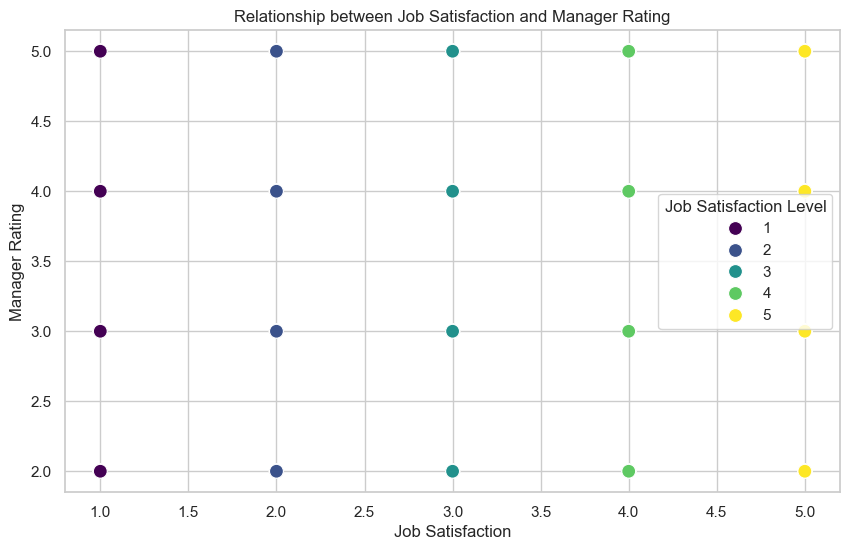

In [60]:
# Create a scatter plot to visualize the relationship between JobSatisfaction and ManagerRating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Data, x='JobSatisfaction', y='ManagerRating', hue='JobSatisfaction', palette='viridis', s=100)

# Add titles and labels
plt.title('Relationship between Job Satisfaction and Manager Rating')
plt.xlabel('Job Satisfaction')
plt.ylabel('Manager Rating')
plt.legend(title='Job Satisfaction Level')

# Show the plot
plt.show()

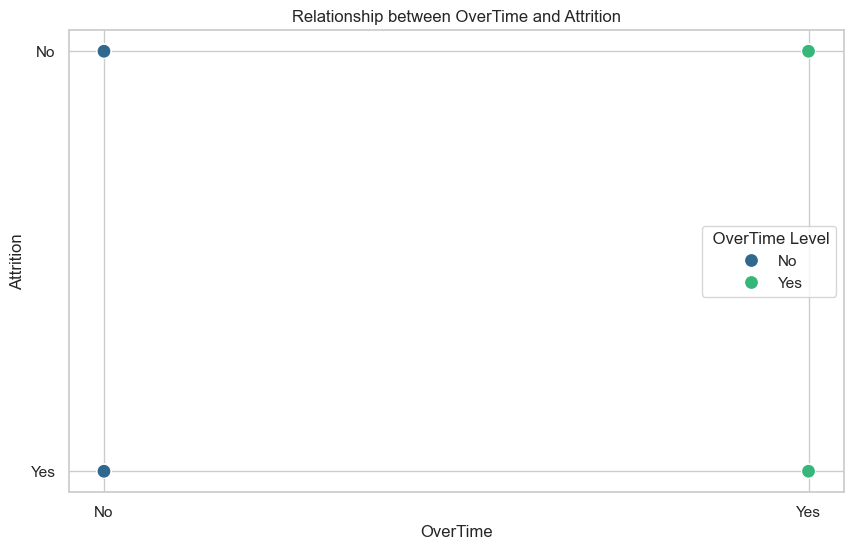

In [62]:
# Create a scatter plot to visualize the relationship between JobSatisfaction and ManagerRating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Employee, x='OverTime', y='Attrition', hue='OverTime', palette='viridis', s=100)

# Add titles and labels
plt.title('Relationship between OverTime and Attrition')
plt.xlabel('OverTime')
plt.ylabel('Attrition')
plt.legend(title=' OverTime Level')

# Show the plot
plt.show()

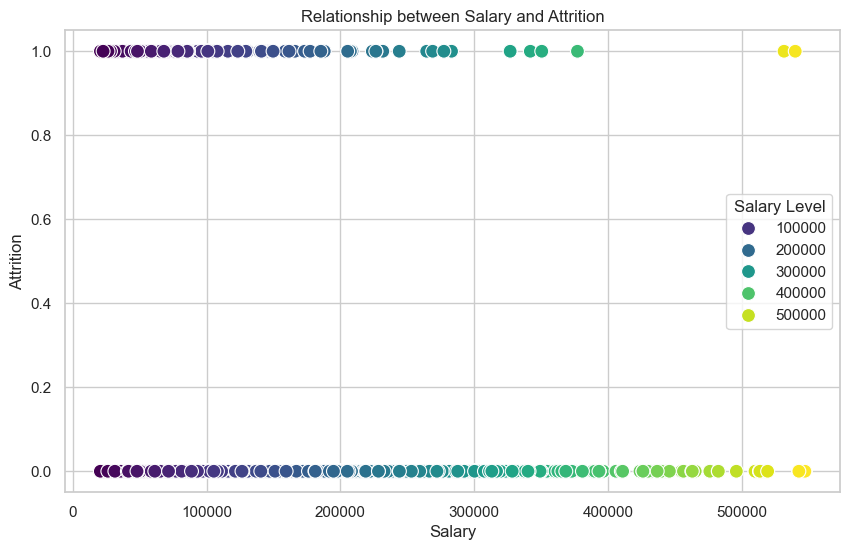

In [63]:
# Create a scatter plot to visualize the relationship between Salary and Attrition
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Data, x='Salary', y='Attrition', hue='Salary', palette='viridis', s=100)

# Add titles and labels
plt.title('Relationship between Salary and Attrition')
plt.xlabel('Salary')
plt.ylabel('Attrition')
plt.legend(title='Salary Level')

# Show the plot
plt.show()

# Identify Outliers In Salary :

In [173]:
Q1 = HR_Data['Salary'].quantile(0.25)
Q3 = HR_Data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define Ranges for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Outliers = HR_Data[(HR_Data['Salary'] < lower_bound) | (HR_Data['Salary'] > upper_bound)]

# Get unique EmployeeID values for the outliers:

In [174]:
Unique_Outliers = Outliers['EmployeeID'].unique()

# Retrieve corresponding rows in HR_Data using isin without additional indexing
Outliers_Rating = HR_Data[HR_Data['EmployeeID'].isin(Unique_Outliers)][['EmployeeID', 'Salary', 'ManagerRating','YearsAtCompany','OverTime','EducationField','Age','Gender','EducationLevel','Department']]
Outliers_Rating[(Outliers_Rating['ManagerRating']==2) & ((Outliers_Rating['YearsAtCompany']==2) | (Outliers_Rating['YearsAtCompany']==3))]


,EmployeeID,Salary,ManagerRating,YearsAtCompany,OverTime,EducationField,Age,Gender,EducationLevel,Department
4064,3DCC-7FA4,311448,2,3,Yes,Marketing,34,Female,High School,Sales
4114,200B-1979,339245,2,3,No,Information Systems,50,Male,Bachelors,Technology
4428,3CFD-6622,513325,2,3,No,Information Systems,40,Female,Bachelors,Technology
4829,18CE-8F30,330940,2,3,No,Marketing,31,Female,Doctorate,Sales
4931,C2BF-D441,350101,2,3,No,Computer Science,47,Female,Bachelors,Technology
5297,200B-1979,339245,2,3,No,Information Systems,50,Male,Bachelors,Technology
5629,3CFD-6622,513325,2,3,No,Information Systems,40,Female,Bachelors,Technology
5830,991F-BAF4,350024,2,2,No,Information Systems,33,OTher,High School,Technology
5862,5B0B-B105,360384,2,2,No,Marketing,35,Male,High School,Sales
5916,3EDA-3BDE,371727,2,3,No,Information Systems,31,Male,No Formal Qualifications,Technology


# Scatter plot for All salaries:


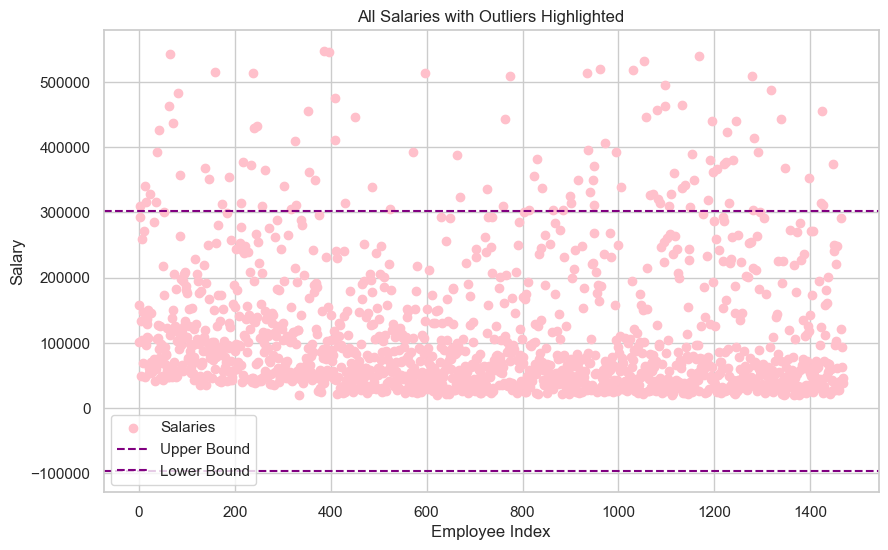

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(HR_Emp)), HR_Emp['Salary'], color='Pink', label='Salaries')
plt.axhline(y=upper_bound, color='Purple', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound, color='Purple', linestyle='--', label='Lower Bound')
plt.title("All Salaries with Outliers Highlighted")
plt.xlabel("Employee Index")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Scatter plot for outliers Salaries:


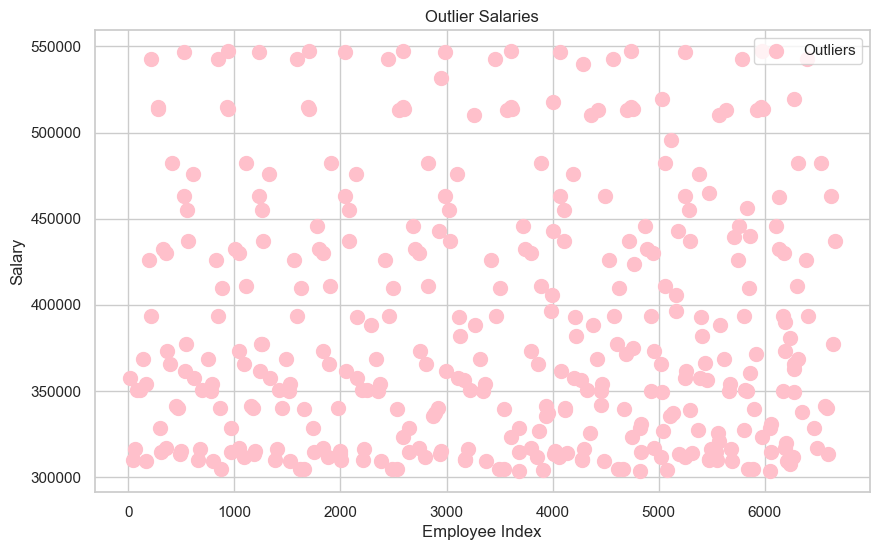

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(Outliers.index, Outliers['Salary'], color='Pink', label='Outliers', s=100)
plt.title("Outlier Salaries")
plt.xlabel("Employee Index")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

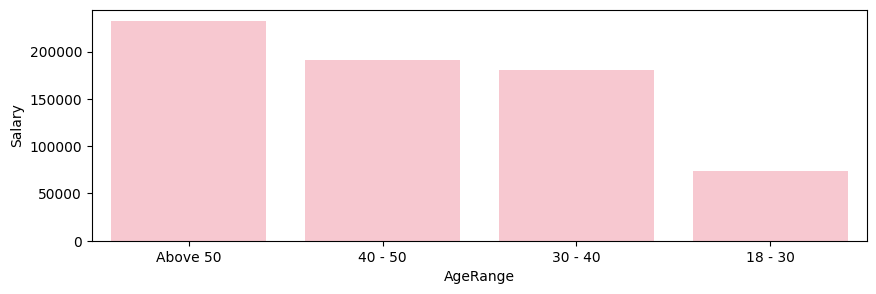

In [131]:
plt.figure(figsize=(10,3))
sns.barplot(x=Avg_SalaryAgeRanges.AgeRange,y=Avg_SalaryAgeRanges.Salary,color='pink')
plt.show()

# Historical Performance:

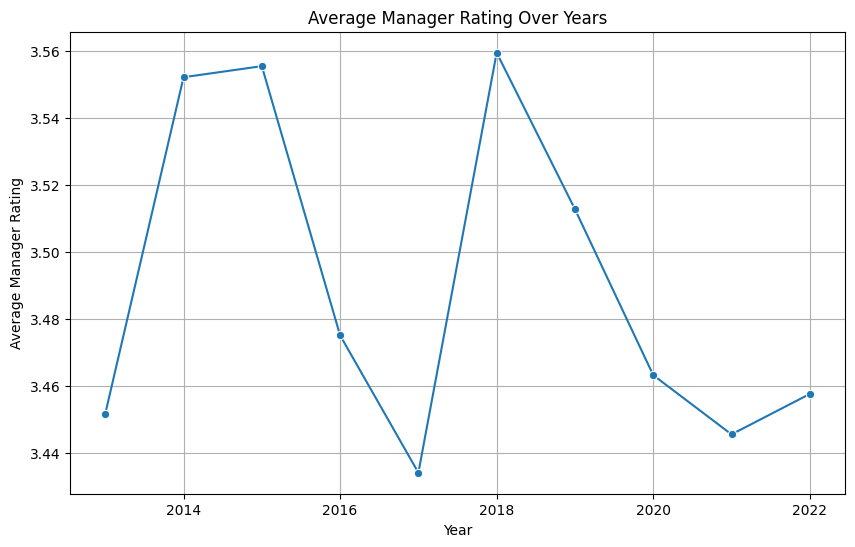

In [83]:
# ManagerRating over years due to ReviewDate:

# Extract year from 'ReviewDate'

HR_PerformanceRating.loc[:, 'ReviewYear'] = HR_PerformanceRating['ReviewDate'].dt.year

# Group by year and calculate the average ManagerRating
average_manager_rating_by_year = HR_PerformanceRating.groupby('ReviewYear')['ManagerRating'].mean().reset_index()

# Plot the average ManagerRating over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_manager_rating_by_year, x='ReviewYear', y='ManagerRating', marker='o')
plt.title('Average Manager Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.grid(True)
plt.show()

# Attrition Page:

# Attrition By Age&Gender:

In [42]:
# Count employees who left by AgeRange and Gender
Att_CountAG = HR_Employee[HR_Employee['Attrition'] == 'Yes'].groupby(['AgeRange', 'Gender'])['EmployeeID'].count()

# Count total employees by AgeRange and Gender
Total_EmpAG = HR_Employee.groupby(['AgeRange', 'Gender'])['EmployeeID'].count()


# Calculate Attrition Rate (%)
Att_RateAG = ((Att_CountAG / Total_EmpAG) * 100).round(1)
Att_RateAG = Att_RateAG.fillna(0).astype(int)
Att_RateAG

AgeRange  Gender
18 - 30   Female    20
          Male      21
          OTher     17
30 - 40   Female    10
          Male      10
          OTher      0
40 - 50   Female     4
          Male       9
          OTher      7
Above 50  Male       0
Name: EmployeeID, dtype: int64

# Plotting Result:

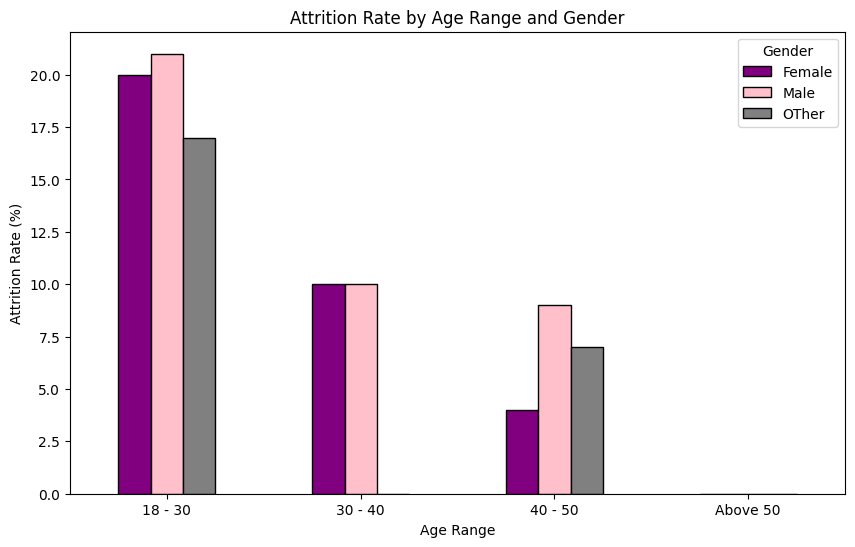

In [77]:
import matplotlib.pyplot as plt

# Unstack data for visualization
Attrition_Data = Att_RateAG.unstack()

# Define custom colors for bars
colors = ['purple', 'pink', 'gray']

# Plot grouped bar chart with custom colors
Attrition_Data.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Age Range")
plt.ylabel("Attrition Rate (%)")
plt.title("Attrition Rate by Age Range and Gender")  # ✅ Fixed string issue
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.legend(title="Gender")

# Display the chart
plt.show()


# Prediction With Scikit-Learn Library And Linear Regression Model :

# Install scikit-learn Library:

In [ ]:
!pip install scikit-learn

In [40]:
import sklearn
print(sklearn.__version__)

1.6.1


# Predict Hire Count For 5 Years::

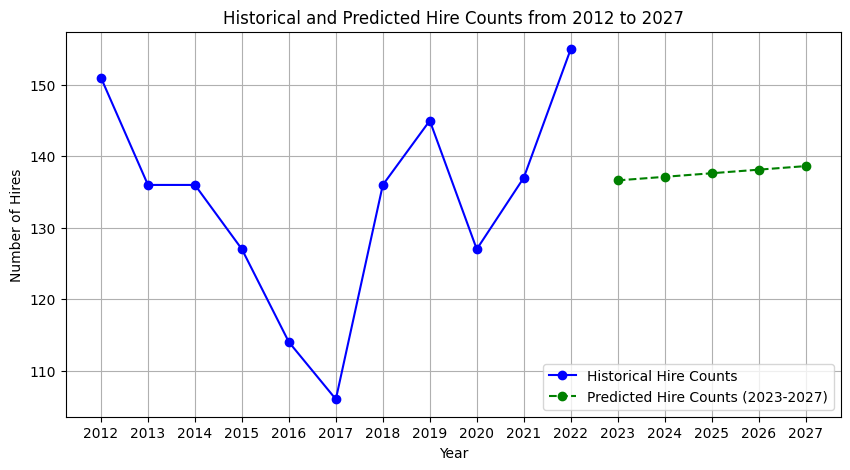

In [98]:

import datetime

HR_Employee['HireYear'] = pd.to_datetime(HR_Employee['HireDate']).dt.year
hire_counts = HR_Employee.groupby('HireYear').size()

# Prepare data for linear regression model
X_hire = hire_counts.index.values.reshape(-1, 1)
y_hire = hire_counts.values

# Train the linear regression model
model_hire = LinearRegression()
model_hire.fit(X_hire, y_hire)

# Predict hire counts for the years 2023 to 2027
future_years_hire = np.array(range(2023, 2028)).reshape(-1, 1)
predicted_hires = model_hire.predict(future_years_hire)

# Plot both historical and predicted hire counts
plt.figure(figsize=(10,5))

# Historical hire counts
plt.plot(hire_counts.index, hire_counts.values, marker='o', color='blue', label='Historical Hire Counts')

# Predicted hire counts from 2023 to 2027
plt.plot(future_years_hire, predicted_hires, marker='o', color='green', linestyle='--', label='Predicted Hire Counts (2023-2027)')

plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.title('Historical and Predicted Hire Counts from 2012 to 2027')
plt.xticks(np.arange(2012, 2028, 1))
plt.legend()
plt.grid(True)
plt.show()

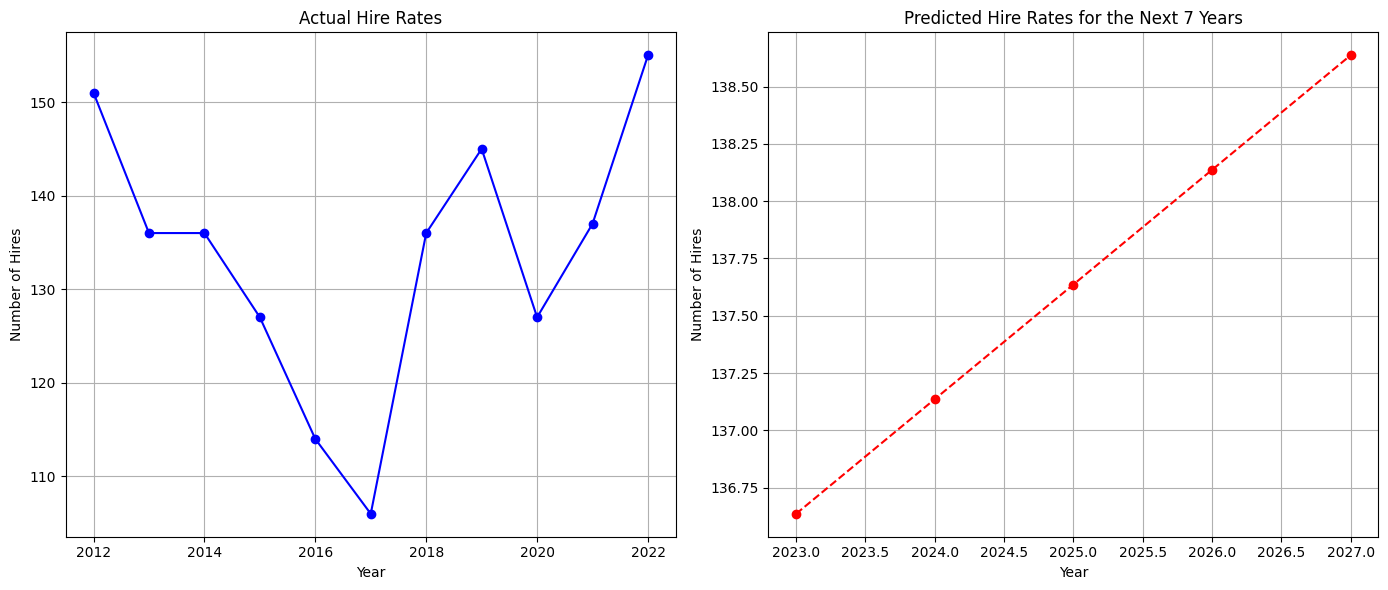

In [82]:

# Count hires per year
hire_counts = HR_Employee['HireYear'].value_counts().sort_index()

# Prepare data for modeling
X = hire_counts.index.values.reshape(-1, 1)  # Years
y = hire_counts.values  # Number of hires

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict hires for the next 7 years
future_years = np.array([(datetime.datetime.now().year)-3 + i for i in range(1, 5)]).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot the results
plt.figure(figsize=(14, 6))

# Actual hires line plot
plt.subplot(1, 2, 1)
plt.plot(X, y, marker='o', color='blue', label='Actual Hires')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.title('Actual Hire Rates')
plt.grid(True)

# Predicted hires line plot
plt.subplot(1, 2, 2)
plt.plot(future_years_hire, predicted_hires, marker='o', color='red', linestyle='--', label='Predicted Hires')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.title('Predicted Hire Rates for the Next 7 Years')
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict Attrition Rate For 5 Years::

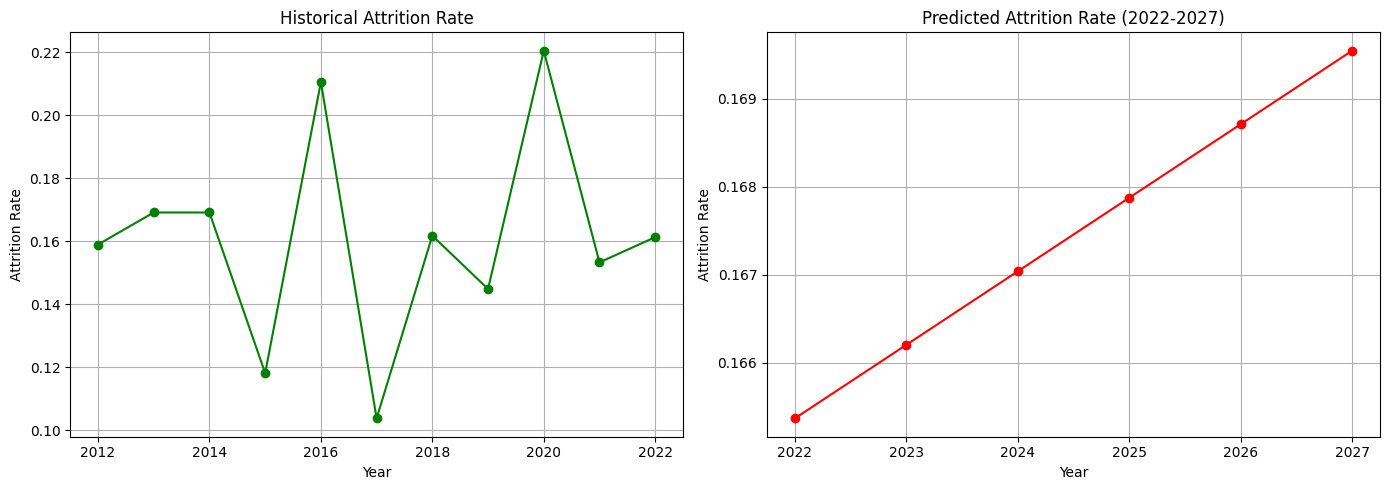

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and clean data
Filtered_Attrition = HR_Employee.dropna().copy()

# Convert HireDate to datetime
Filtered_Attrition['HireDate'] = pd.to_datetime(Filtered_Attrition['HireDate'], errors='coerce')

# Ensure relevant columns exist and drop any newly created NaN values
relevant_columns = ['HireDate', 'Attrition']
Filtered_Attrition = Filtered_Attrition[relevant_columns].dropna()

# Extract year from HireDate
Filtered_Attrition['Year'] = Filtered_Attrition['HireDate'].dt.year

# Ensure "Attrition" contains only 'Yes' and 'No' values before mapping
Filtered_Attrition = Filtered_Attrition[Filtered_Attrition['Attrition'].isin(['Yes', 'No'])]

# Convert Attrition to numeric (Yes = 1, No = 0)
Filtered_Attrition['Attrition'] = Filtered_Attrition['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate historical attrition rate
historical_attrition = Filtered_Attrition.groupby('Year')['Attrition'].mean()

# Prepare future predictions (2022-2027) using a simple linear model
X = Filtered_Attrition[['Year']]
y_attrition = Filtered_Attrition['Attrition']

# Train the model
attrition_model = LinearRegression()
attrition_model.fit(X, y_attrition)

# Predict attrition rate for the years 2022 to 2027
future_years = pd.DataFrame({'Year': range(2022, 2028)})  # Use a DataFrame to match training format
predicted_attrition = attrition_model.predict(future_years)

# Plot the historical and predicted attrition rates
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Historical Attrition Rate
axs[0].plot(historical_attrition.index, historical_attrition.values, marker='o', color='g')
axs[0].set_title('Historical Attrition Rate')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Attrition Rate')
axs[0].grid(True)

# Predicted Attrition Rate
axs[1].plot(future_years['Year'], predicted_attrition, marker='o', color='r')
axs[1].set_title('Predicted Attrition Rate (2022-2027)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Attrition Rate')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# Predict Performance For 5 Years:

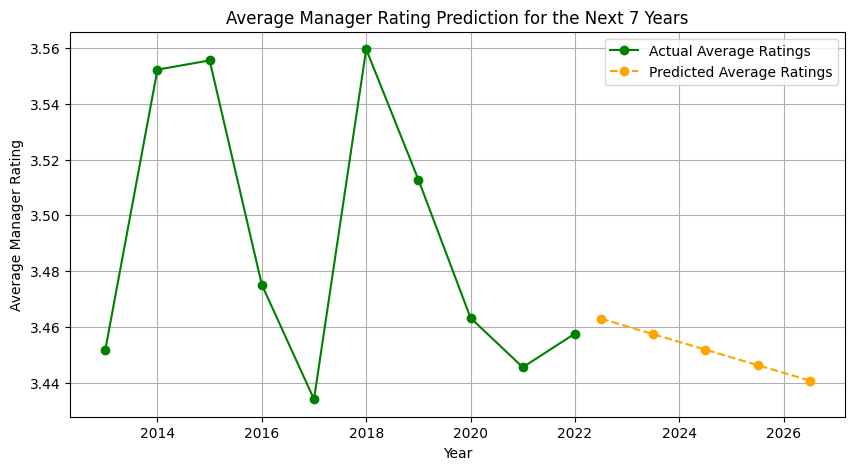

In [99]:

# Extract year from ReviewDate
HR_PerformanceRating.loc[:, 'ReviewYear'] = HR_PerformanceRating['ReviewDate'].dt.year

# Calculate average ManagerRating per year
average_ratings_per_year = HR_PerformanceRating.groupby('ReviewYear')['ManagerRating'].mean()

# Prepare data for modeling
X_ratings = average_ratings_per_year.index.values.reshape(-1, 1)  # Years
y_ratings = average_ratings_per_year.values  # Average ratings

# Fit a linear regression model
model_ratings = LinearRegression()
model_ratings.fit(X_ratings, y_ratings)

# Predict average ratings for the next 7 years
future_years_ratings = np.array([(datetime.datetime.now().year)-3.5 + i for i in range(1,6)]).reshape(-1, 1)
predicted_ratings = model_ratings.predict(future_years_ratings)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(X_ratings, y_ratings, marker='o', color='green', label='Actual Average Ratings')
plt.plot(future_years_ratings, predicted_ratings, marker='o', color='orange', linestyle='--', label='Predicted Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.title('Average Manager Rating Prediction for the Next 7 Years')
plt.legend()
plt.grid(True)
plt.show()

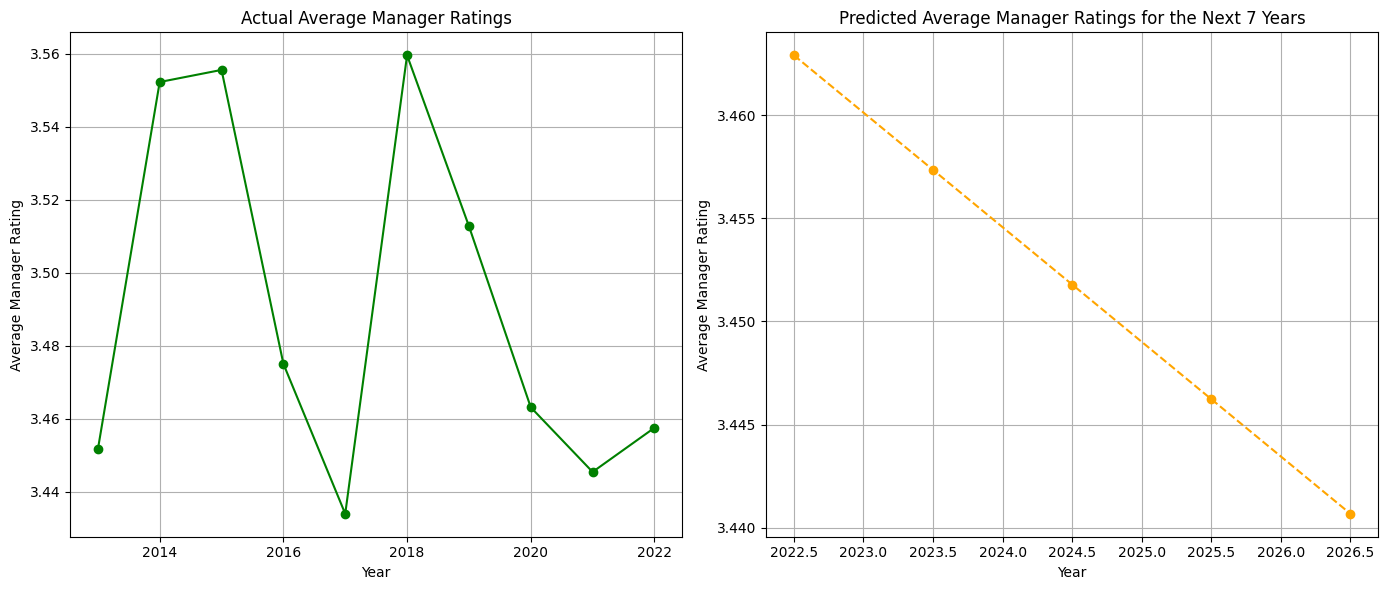

In [74]:
# Plot the results in two separate charts
plt.figure(figsize=(14, 6))

# Actual average ratings line plot
plt.subplot(1, 2, 1)
plt.plot(X_ratings, y_ratings, marker='o', color='green', label='Actual Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.title('Actual Average Manager Ratings')
plt.grid(True)

# Predicted average ratings line plot
plt.subplot(1, 2, 2)
plt.plot(future_years_ratings, predicted_ratings, marker='o', color='orange', linestyle='--', label='Predicted Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.title('Predicted Average Manager Ratings for the Next 7 Years')
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict Salary For 5 Years:

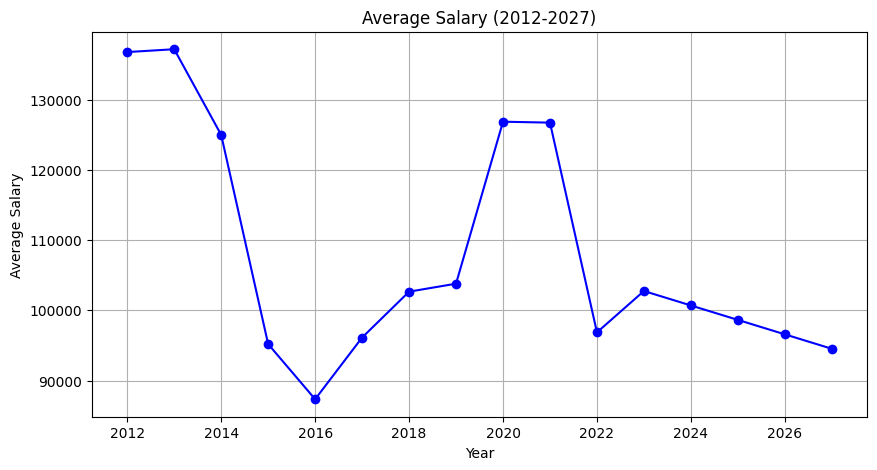

In [89]:

# Filter data for relevant columns
Relevant_Columns = ['HireDate', 'Salary']
Filtered_Salary = HR_Employee[Relevant_Columns].copy()

# Extract year from HireDate
Filtered_Salary['Year'] = Filtered_Salary['HireDate'].dt.year

# Calculate historical average salary
historical_salary = Filtered_Salary.groupby('Year')['Salary'].mean()

# Prepare future predictions (2022-2027) using a simple linear model
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
X = Filtered_Salary[['Year']]
y_salary = Filtered_Salary['Salary']

# Initialize and train the model
salary_model = LinearRegression()
salary_model.fit(X, y_salary)

# Predict average salary for the years 2022 to 2027
future_years = pd.DataFrame({'Year': range(2022, 2028)})  
predicted_salary = salary_model.predict(future_years)

# Combine historical and predicted data
all_years = np.arange(historical_salary.index.min(), 2028)
combined_salary = np.concatenate((historical_salary.values, predicted_salary))[:len(all_years)]

# Plot the average salary from 2012 to 2027
plt.figure(figsize=(10, 5))
plt.plot(all_years, combined_salary, marker='o', color='b')
plt.title('Average Salary (2012-2027)')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()